## Problem Statement:

#### The Marketing Service Platform leverages AI and analytics to optimize ad placement, aiming for maximum engagement at minimum cost across diverse regions and languages.

#### The task is to analyze the daily view count data of  Wikipedia pages over 1 year 6 months in days. The goal is to predict future views, helping clients to strategically place their ads and maximize their reach.

## To Do:

- Import the dataset and doing usual exploratory analysis steps like checking the structure & characteristics of the dataset 
- Checking null values and understand their reason 
- Understanding the page name format and splitting it to get different information 
- Separating different values from it like title, language, access type, and access origin 
- Visualizing the data and getting inferences from them 
- Converting the data to a format that can be fed to the Arima model (Pivoting etc) 
- Checking if the data is stationary 
    - Dickey-Fuller test 
- Trying different methods for stationarity. 
    - Decomposition of series. 
    - Differencing the series. 
- Plotting the ACF and PACF plots
    - Give insights about the characteristics of the time series. 
- Modeling 
    - Creating and training the Arima model 
    - Getting the exogenous variable and using it to train a sarimax model 
    - Use facebook prophet for forecasting 
- Finding a way (grid search / etc) to find the best params for at least 1 modeling approach. 
- Defining functions for all of the tasks. 
- Comparing results for all languages and creating inferences and recommendations from them.

## Importing required Libraries:

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from prophet import Prophet 
import re 
import seaborn as sns 
from sklearn.metrics import mean_absolute_percentage_error 
import statsmodels.api as sm 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df = pd.read_csv("ArticleDailyViews.csv") 
df_exog = pd.read_csv("EnglishPageCampaignEvents.csv")

In [4]:
print(df.shape) 
print(df_exog.shape)

(145063, 551)
(550, 1)


In [5]:
df.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09  2015-07-10  2015-07-11  2015-07-12  2015-07-13  2015-07-14  \
0        26.0        24.0        19.0        10.0        14.0        15.0   
1        10.0         4.0        41.0        65.0        57.0        38.0   
2         4.0         4.0         1.0         1.0         1.0         6.0   
3        11.0        16.0        16.0        11.0        23.0       145.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-15  2015-07-16  2015-07-17  2015-07-18  2015-07-19  2015-07-20  \
0         8.0        16.0         8.0         8.0        16.0         7.0   
1        20.0        62.0        44.0        15.0        10.0        47.0   
2         8.0         6.0         4.0         5.0         1.0         2.0   
3        14.0        17.0        85.0         4.0        30.0        22.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-21  2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  \
0        11.0        10.0        20.0        18.0        15.0        14.0   
1        24.0        17.0        22.0         9.0        39.0        13.0   
2         3.0         8.0         8.0         6.0         6.0         2.0   
3         9.0        10.0        11.0         7.0         7.0        11.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  2015-08-01  \
0        49.0        10.0        16.0        18.0         8.0         5.0   
1        11.0        12.0        21.0        19.0         9.0        15.0   
2         2.0         3.0         2.0         4.0         3.0         3.0   
3         9.0        11.0        44.0         8.0        14.0        19.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-02  2015-08-03  2015-08-04  2015-08-05  2015-08-06  2015-08-07  \
0         9.0         7.0        13.0         9.0         7.0         4.0   
1        33.0         8.0         8.0         7.0        13.0         2.0   
2         5.0         3.0         5.0         4.0         2.0         5.0   
3        10.0        17.0        17.0        10.0         7.0        10.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-08  2015-08-09  2015-08-10  2015-08-11  2015-08-12  2015-08-13  \
0        11.0        10.0         5.0         9.0         9.0         9.0   
1        23.0        12.0        27.0        27.0        36.0        23.0   
2         1.0         4.0         5.0         0.0         0.0         7.0   
3         1.0         8.0        27.0        19.0        16.0         2.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-08-14  2015-08-15  2015-08-16  2015-08-17  2015-08-18  2015-08-19  \
0         9.0        13.0         4.0        15.0        25.0         9.0   
1        58.0        80.0        60.0        69.0        42.0       161.0   
2         3.0         5.0         1.0         6.0         2.0         5.0   
3        84.0     

In [6]:
df.tail()

Page  2015-07-01  \
145058  Underworld_(serie_de_películas)_es.wikipedia.o...         NaN   
145059  Resident_Evil:_Capítulo_Final_es.wikipedia.org...         NaN   
145060  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...         NaN   
145061  Hasta_el_último_hombre_es.wikipedia.org_all-ac...         NaN   
145062  Francisco_el_matemático_(serie_de_televisión_d...         NaN   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-07  2015-07-08  2015-07-09  2015-07-10  2015-07-11  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-12  2015-07-13  2015-07-14  2015-07-15  2015-07-16  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-17  2015-07-18  2015-07-19  2015-07-20  2015-07-21  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-22  2015-07-23  2015-07-24  2015-07-25  2015-07-26  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-07-27  2015-07-28  2015-07-29  2015-07-30  2015-07-31  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-08-01  2015-08-02  2015-08-03  2015-08-04  2015-08-05  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-08-06  2015-08-07  2015-08-08  2015-08-09  2015-08-10  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN         NaN         NaN         NaN   
145061         NaN         NaN         NaN         NaN         NaN   
145062         NaN         NaN         NaN         NaN         NaN   

        2015-08-11  2015-08-12  2015-08-13  2015-08-14  2015-08-15  \
145058         NaN         NaN         NaN         NaN         NaN   
145059         NaN         NaN         NaN         NaN         NaN   
145060         NaN         NaN      

## Basic Data Pre-processing:

#### Extracting Languages:

In [7]:
df['language'] = df['Page'].apply(lambda x: re.search('(.*)(\_)([a-z]+)(\.wiki[pm]edia.org\_)(.*)', x).group(3) if re.search('(.*)(\_)([a-z]+)(\.wiki[pm]edia.org\_)(.*)', x) else np.nan)

In [8]:
df['language'].value_counts(dropna=False, normalize=True)*100 

en         16.618986
ja         14.084225
de         12.785479
fr         12.271909
zh         11.876909
ru         10.355501
es          9.698545
commons     7.276149
NaN         5.032296
Name: language, dtype: float64

In [9]:
for i in df[df['language'].isna()]['Page'].head(5): 
    print(i) 

"Keep_me_logged_in"_extended_to_one_year_www.mediawiki.org_all-access_all-agents
2017_wikitext_editor_www.mediawiki.org_all-access_all-agents
2017_wikitext_editor/Feedback_www.mediawiki.org_all-access_all-agents
API_www.mediawiki.org_all-access_all-agents
API:Account_creation_www.mediawiki.org_all-access_all-agents


#### Upon inspecting the pages, it appears they don't belong to a specific website, and they only account for 5% of the total dataset. Therefore, it would be reasonable to remove these entries during the data cleaning process.

In [10]:
df = df.loc[~df['language'].isna()] 
df['language'].value_counts(dropna=False, normalize=True)*100

en         17.499619
ja         14.830542
de         13.462976
fr         12.922192
zh         12.506261
ru         10.904234
es         10.212466
commons     7.661709
Name: language, dtype: float64

#### Transposing Data: (Rows-into-Columns and Columns-into-Rows)

In [11]:
df = df.melt(id_vars=['Page', 'language'], var_name='view_date', value_name='num_views') 
df.shape

(75769650, 4)

In [12]:
df.head()

Page language   view_date  \
0            2NE1_zh.wikipedia.org_all-access_spider       zh  2015-07-01   
1             2PM_zh.wikipedia.org_all-access_spider       zh  2015-07-01   
2              3C_zh.wikipedia.org_all-access_spider       zh  2015-07-01   
3         4minute_zh.wikipedia.org_all-access_spider       zh  2015-07-01   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...       zh  2015-07-01   

   num_views  
0       18.0  
1       11.0  
2        1.0  
3       35.0  
4        NaN

In [13]:
df.tail()

Page language  \
75769645  Underworld_(serie_de_películas)_es.wikipedia.o...       es   
75769646  Resident_Evil:_Capítulo_Final_es.wikipedia.org...       es   
75769647  Enamorándome_de_Ramón_es.wikipedia.org_all-acc...       es   
75769648  Hasta_el_último_hombre_es.wikipedia.org_all-ac...       es   
75769649  Francisco_el_matemático_(serie_de_televisión_d...       es   

           view_date  num_views  
75769645  2016-12-31       10.0  
75769646  2016-12-31        NaN  
75769647  2016-12-31        NaN  
75769648  2016-12-31        NaN  
75769649  2016-12-31        NaN

#### Grouping by Languages:

#### Note: All NaNs appear consecutively and cease after a certain date, suggesting that the NaN values represent dates prior to the creation of the respective pages.

In [14]:
df = df.groupby(['language', 'view_date']).agg({'num_views':'sum'}).reset_index()
df['view_date'] = pd.to_datetime(df['view_date']) 

df.language.value_counts()

commons    550
de         550
en         550
es         550
fr         550
ja         550
ru         550
zh         550
Name: language, dtype: int64

In [15]:
df.isna().sum() 

language     0
view_date    0
num_views    0
dtype: int64

In [16]:
df.duplicated().sum() 

0

#### Now there are no duplicates in the data.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4400 entries, 0 to 4399
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   language   4400 non-null   object        
 1   view_date  4400 non-null   datetime64[ns]
 2   num_views  4400 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 103.2+ KB


In [18]:
df.groupby('language').agg({'num_views' : 'sum'}).sort_values(by='num_views', ascending = False)

num_views
language              
en        5.874876e+10
es        9.490200e+09
de        8.862014e+09
ja        8.571290e+09
ru        7.998366e+09
fr        6.377824e+09
zh        3.171985e+09
commons   1.049475e+09

In [19]:
df_commons = df[df['language']=='commons'] 
df_de = df[df['language']=="de"] 
df_en = df[df['language']=="en"] 
df_es = df[df['language']=="es"] 
df_fr = df[df['language']=="fr"] 
df_ja = df[df['language']=="ja"] 
df_ru = df[df['language']=="ru"] 
df_zh = df[df['language']=="zh"]

all_dfs = [ 
    df_en, df_commons, df_de, df_es, 
    df_fr, df_ja, df_ru, df_zh 
]

In [20]:
df_en['view_date'].describe() 

count                     550
unique                    550
top       2015-07-01 00:00:00
freq                        1
first     2015-07-01 00:00:00
last      2016-12-31 00:00:00
Name: view_date, dtype: object

In [21]:
df_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 1100 to 1649
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   language   550 non-null    object        
 1   view_date  550 non-null    datetime64[ns]
 2   num_views  550 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.2+ KB


In [22]:
df_en.describe(include="all")

language            view_date     num_views
count       550                  550  5.500000e+02
unique        1                  550           NaN
top          en  2015-07-01 00:00:00           NaN
freq        550                    1           NaN
first       NaN  2015-07-01 00:00:00           NaN
last        NaN  2016-12-31 00:00:00           NaN
mean        NaN                  NaN  1.068159e+08
std         NaN                  NaN  2.335470e+07
min         NaN                  NaN  7.656133e+07
25%         NaN                  NaN  9.171655e+07
50%         NaN                  NaN  1.014390e+08
75%         NaN                  NaN  1.141375e+08
max         NaN                  NaN  2.020630e+08

## Exploratory Data Analysis (EDA):

In [23]:
plt.rcParams["figure.figsize"] = (18,6)

In [24]:
def plot_time_series_lineplot(data, title): 
    sns.lineplot(data=data, x="month_year", y="num_views") 
    plt.title(title) 
    plt.xticks(rotation=60) 
    plt.grid() 
    plt.show() 

In [25]:
def get_lang_specific_cleaned_df(data): 
    df_lang = data.copy().reset_index(drop=True) 
    df_lang.drop(columns=['language'], inplace=True) 
    df_lang['num_views'] = df_lang['num_views']/10000 
    return df_lang

In [26]:
def get_month_year_grouped_df(data): 
    data['month_year'] = data['view_date'].dt.to_period('M').astype('string') 
    df_month_group = data.groupby('month_year').agg({ 'num_views' : 'mean'}).reset_index()
    return df_month_group

In [27]:
def plot_all_time_series_lineplot(all_dfs): 
    grouped_dfs = [] 
    for idx, language in enumerate( 
            [ 
                "English", "Common", "German", "Spanish", 
                "French", "Japanese", "Russian", "Chinese" 
            ] 
        ): 
        df_month_group = get_month_year_grouped_df(get_lang_specific_cleaned_df(all_dfs[idx])) 
        df_month_group['language'] = [language]*df_month_group.shape[0] 
        grouped_dfs.append(df_month_group)
        
    final_df = pd.concat(grouped_dfs)
    final_df = final_df.reset_index(drop=True)
    sns.lineplot(data=final_df, x='month_year', y='num_views', hue='language') 
    plt.xticks(rotation=60) 
    plt.legend() 
    plt.grid() 
    plt.show()

In [28]:
def plot_all_time_series_lineplot_without_english(all_dfs): 
    grouped_dfs = [] 
    for idx, language in enumerate( 
            [ 
                "Common", "German", "Spanish", 
                "French", "Japanese", "Russian", "Chinese" 
            ], 
            start=1 
        ): 
            df_month_group = get_month_year_grouped_df(get_lang_specific_cleaned_df(all_dfs[idx])) 
            df_month_group['language'] = [language]*df_month_group.shape[0] 
            grouped_dfs.append(df_month_group)
            
    final_df = pd.concat(grouped_dfs)
    final_df = final_df.reset_index(drop=True)  # Reset the index before plotting
    sns.lineplot(data=final_df, x='month_year', y='num_views', hue='language') 
    plt.xticks(rotation=60) 
    plt.legend() 
    plt.grid() 
    plt.show()

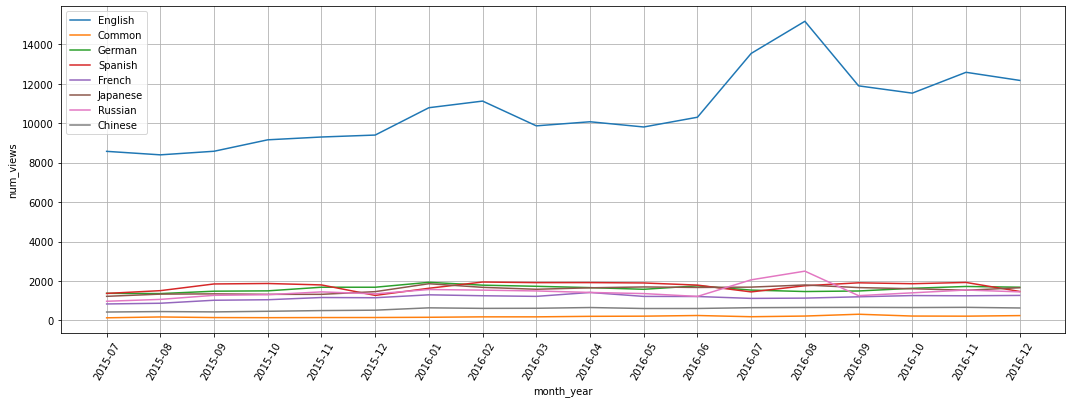

In [29]:
plot_all_time_series_lineplot(all_dfs)

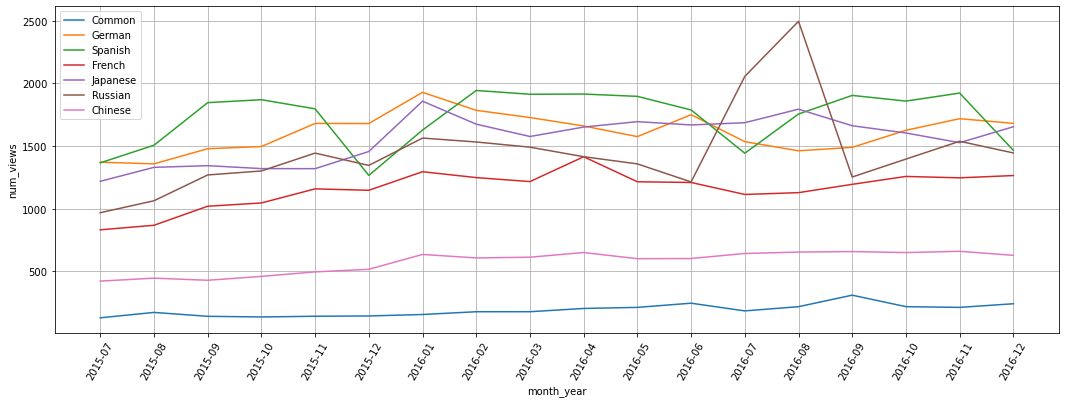

In [30]:
plot_all_time_series_lineplot_without_english(all_dfs)

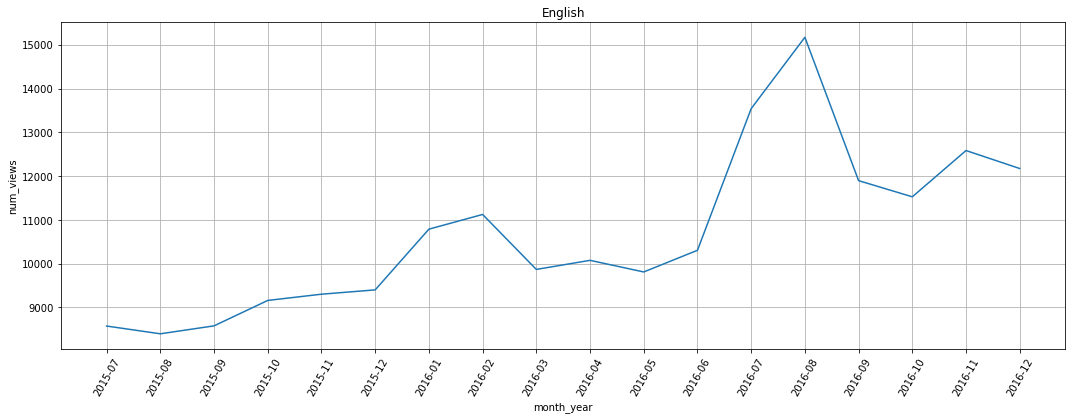

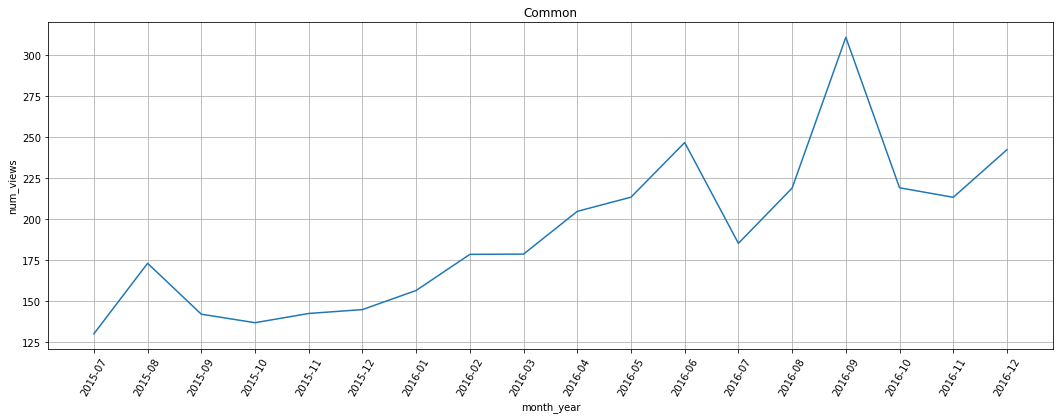

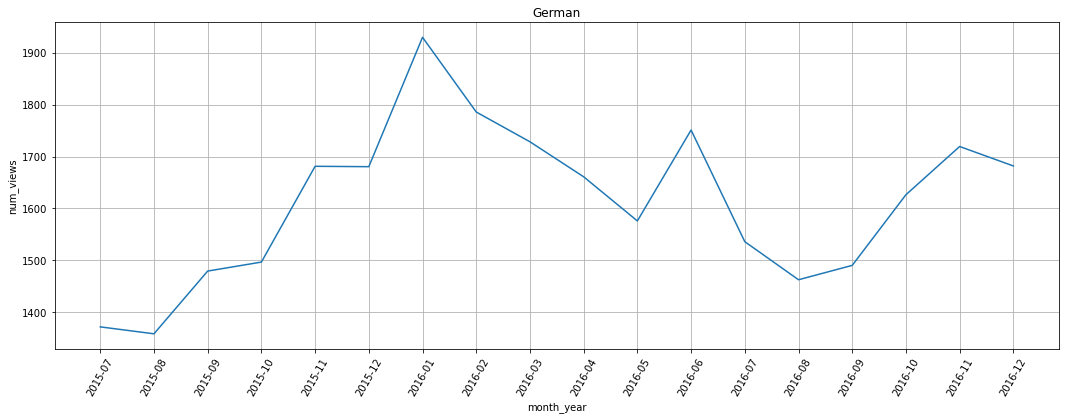

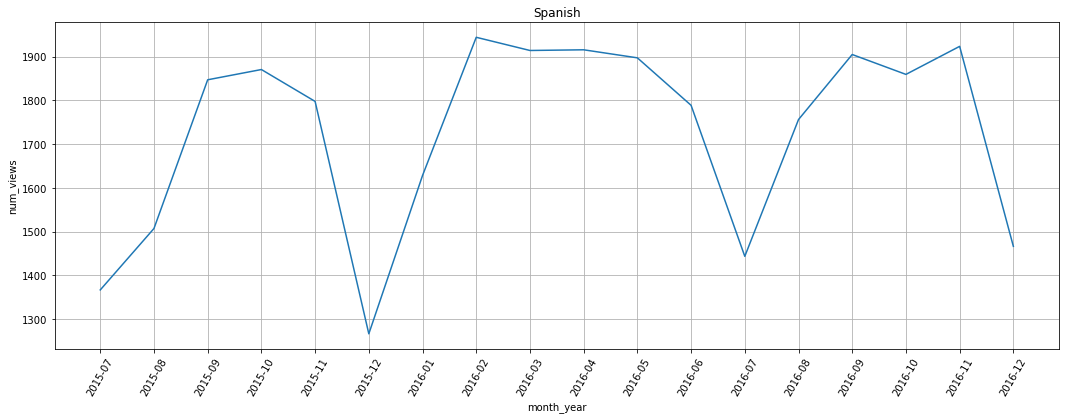

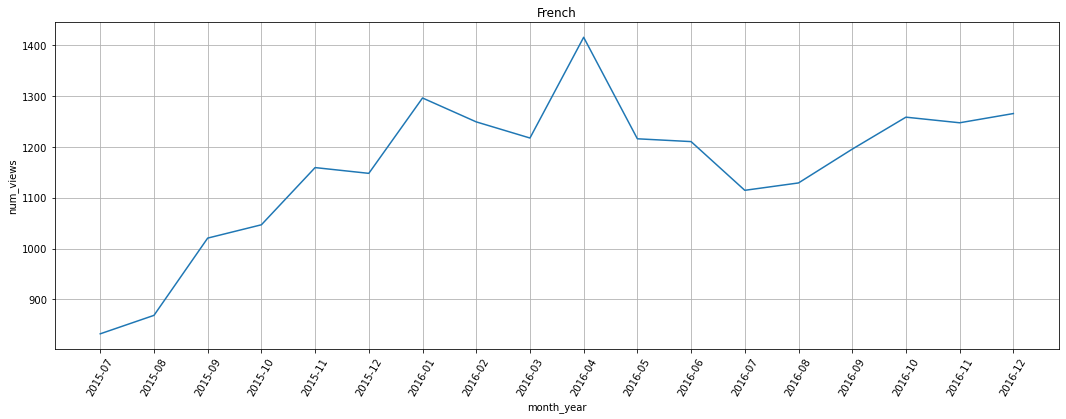

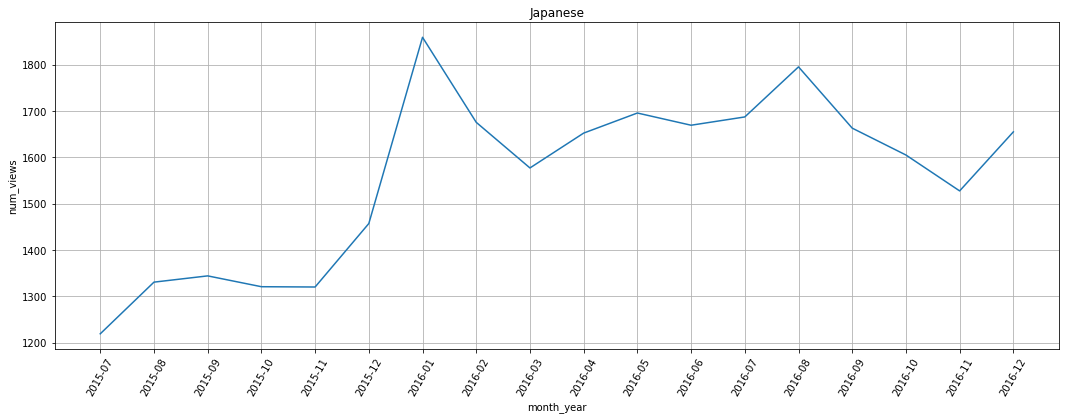

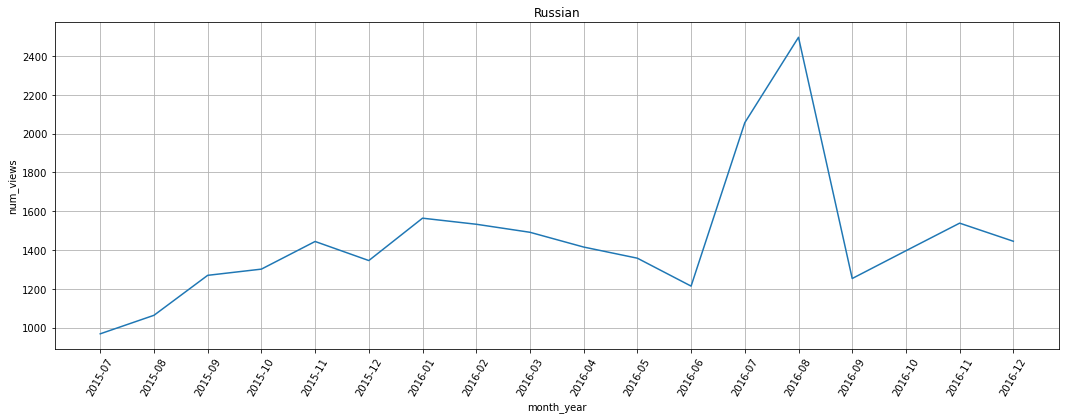

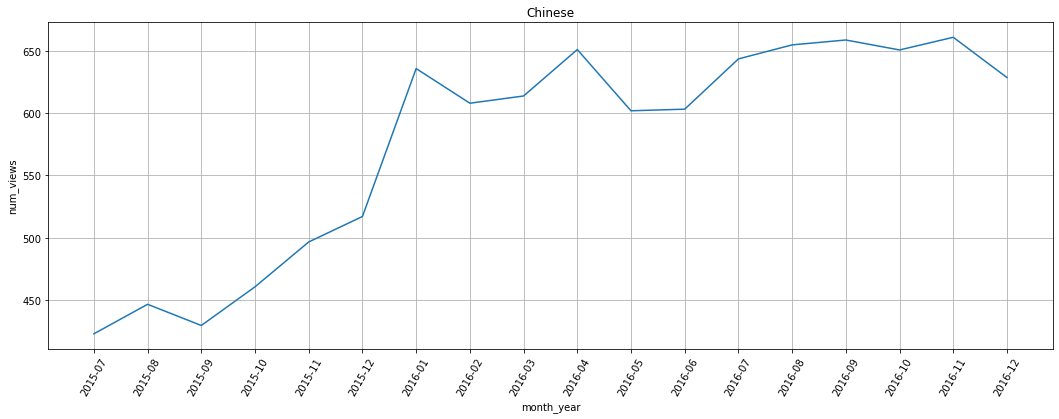

In [31]:
for idx, language in enumerate(
        [
            "English", "Common", "German", "Spanish",
            "French", "Japanese", "Russian", "Chinese"
        ]
    ):
        df_month_group = get_month_year_grouped_df(get_lang_specific_cleaned_df(all_dfs[idx]))
        plot_time_series_lineplot(df_month_group, language)

#### Key Observations:
- English language pages dominate with significantly higher views than other languages.
- A notable spike in views was observed for English and Russian pages in August 2016.
- The hierarchy of average views per language unfolds as:
  - Commons → Chinese → French → Russian → Japanese → German → Spanish → English.

#### Timeseries Decomposition Analysis for English:

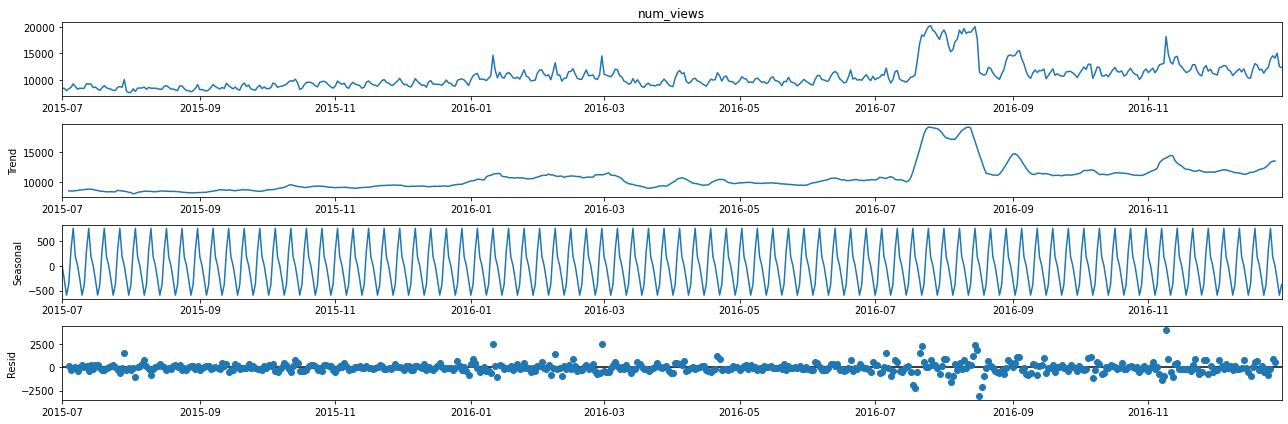

In [32]:
df_clean = get_lang_specific_cleaned_df(all_dfs[0]) 
df_clean.set_index('view_date', inplace=True) 

model = sm.tsa.seasonal_decompose(df_clean.num_views) 
model.plot();

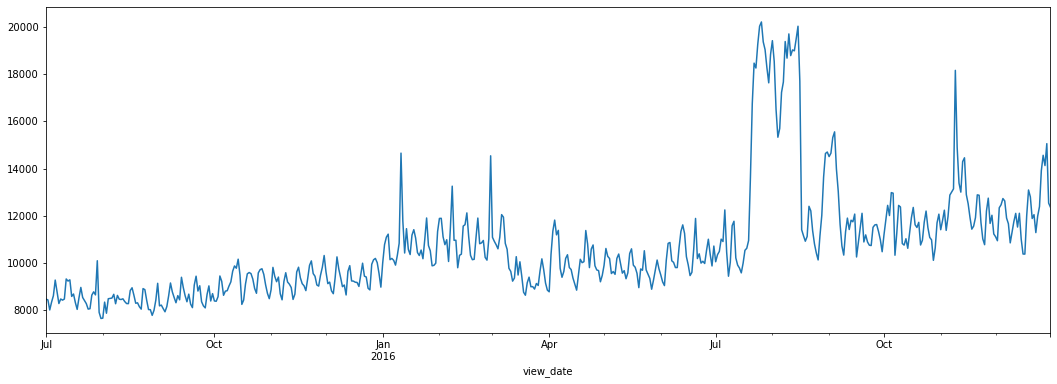

In [33]:
model.observed.plot();

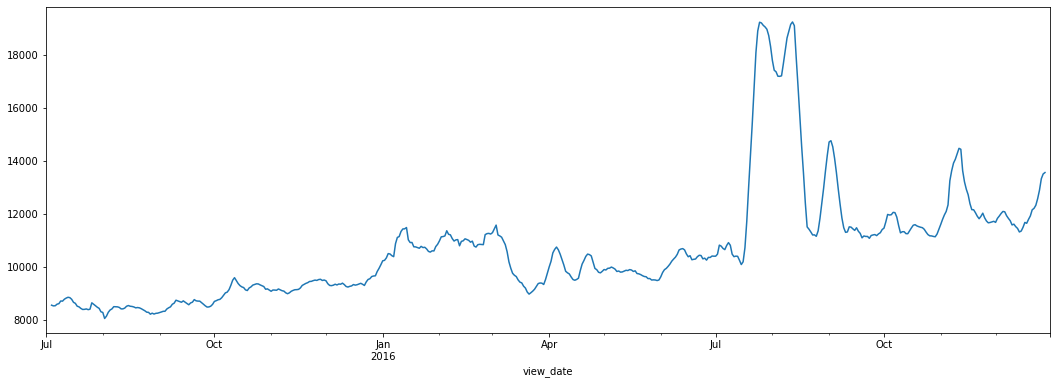

In [34]:
model.trend.plot();

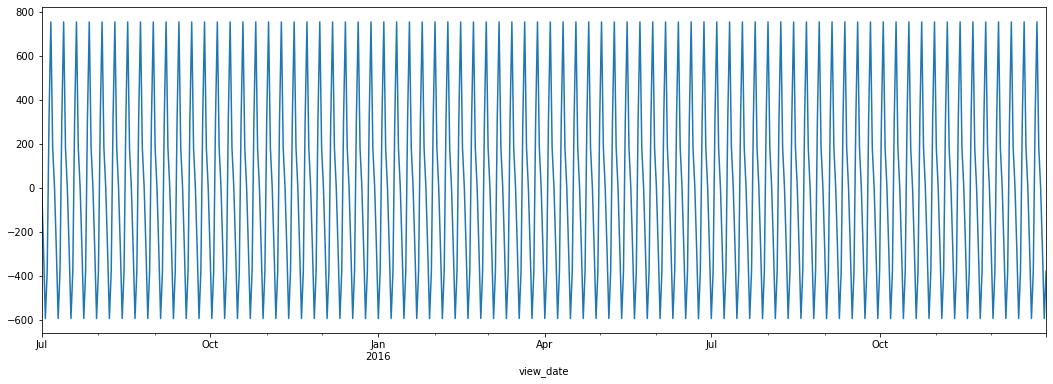

In [35]:
model.seasonal.plot();

#### Key Observation:

- A recurring pattern of four peaks/troughs monthly underscores a distinct weekly seasonality in the time series data.

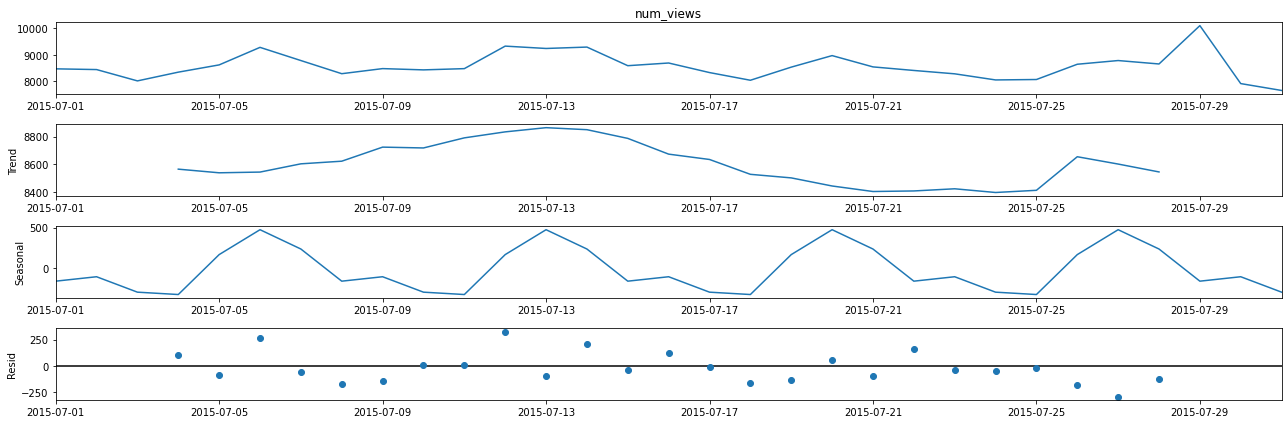

In [36]:
df_clean = get_lang_specific_cleaned_df(all_dfs[0]) 
df_july_2015 = df_clean[ df_clean['view_date'] < '2015-08-01']
df_july_2015.set_index('view_date', inplace=True) 

model = sm.tsa.seasonal_decompose(df_july_2015.num_views) 
model.plot();

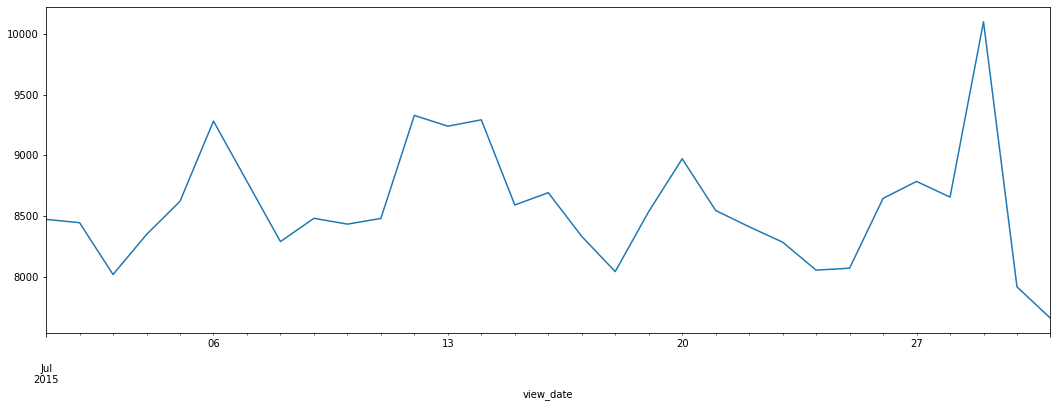

In [37]:
model.observed.plot();

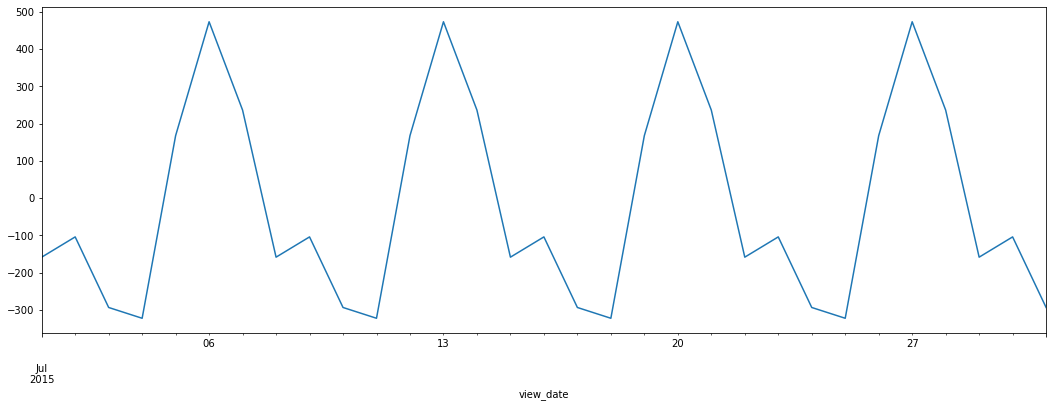

In [38]:
model.seasonal.plot(); 

#### Key Observation:

- Time series analysis uncovers a pronounced weekly seasonality trend.

#### Timeseries Decomposition Analysis for Commons:

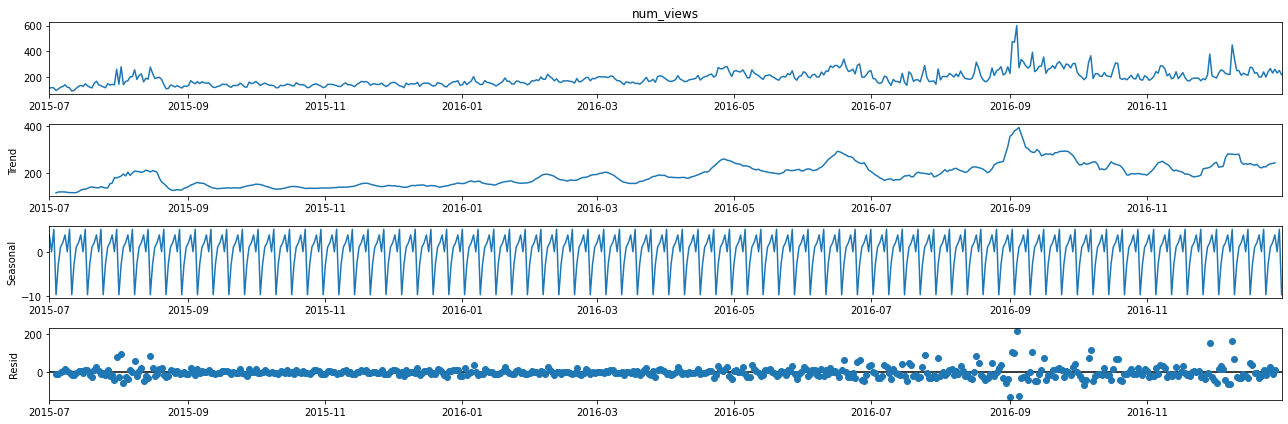

In [39]:
df_clean = get_lang_specific_cleaned_df(all_dfs[1]) 
df_clean.set_index('view_date', inplace=True) 

model = sm.tsa.seasonal_decompose(df_clean.num_views) 
model.plot(); 

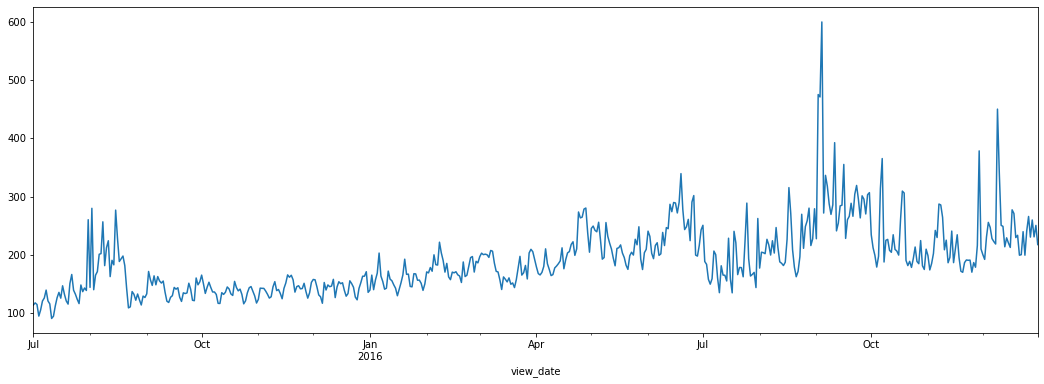

In [40]:
model.observed.plot(); 

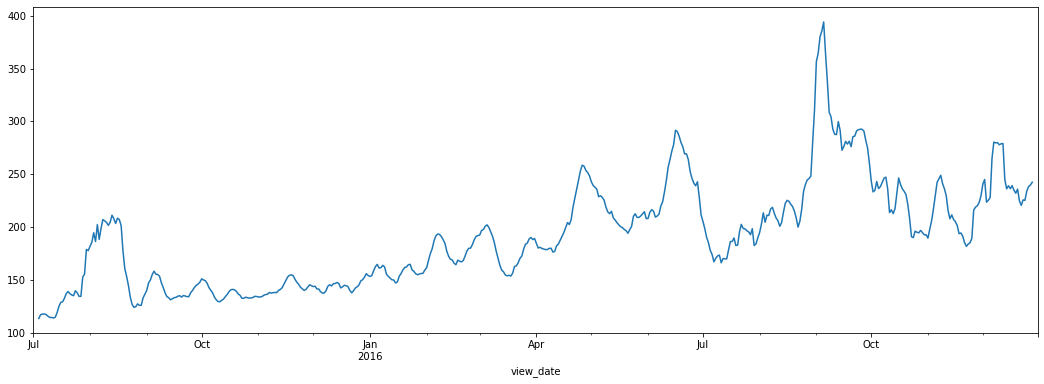

In [41]:
model.trend.plot(); 

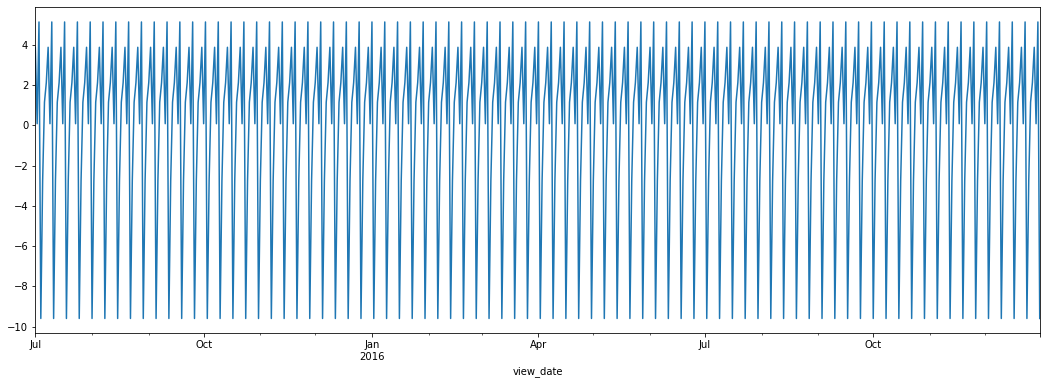

In [42]:
model.seasonal.plot(); 

#### Key Observation:

- A recurring pattern of four peaks/troughs monthly underscores a distinct weekly seasonality in the time series data.

#### Timeseries Decomposition Analysis for German:

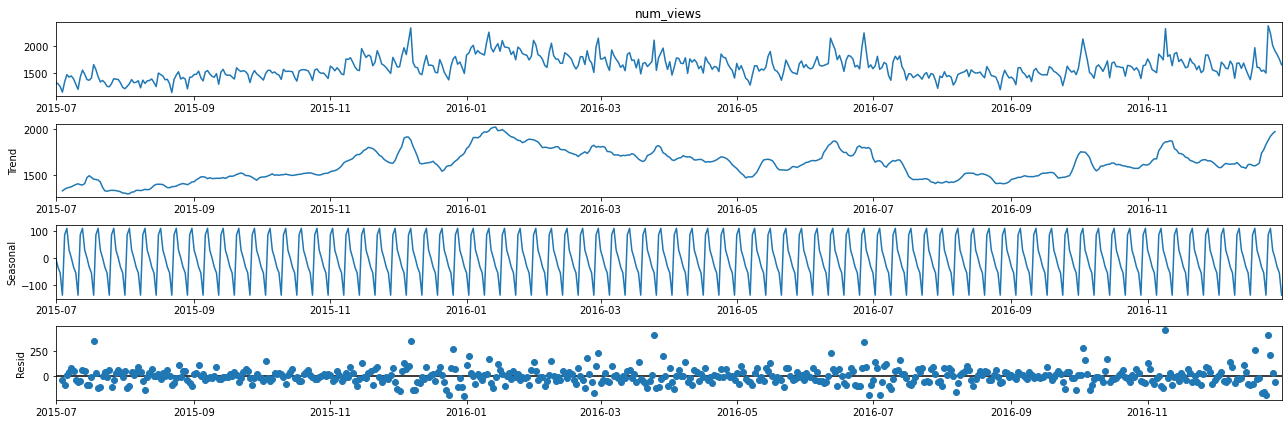

In [43]:
df_clean = get_lang_specific_cleaned_df(all_dfs[2]) 
df_clean.set_index('view_date', inplace=True) 

model = sm.tsa.seasonal_decompose(df_clean.num_views) 
model.plot();

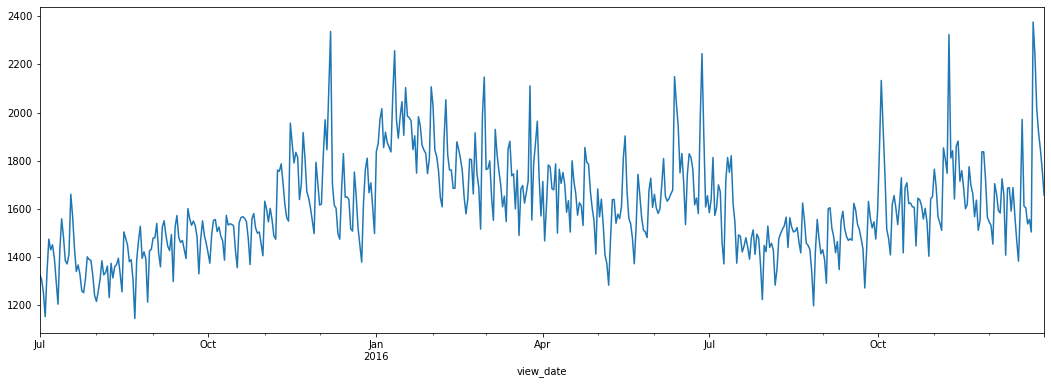

In [44]:
model.observed.plot(); 

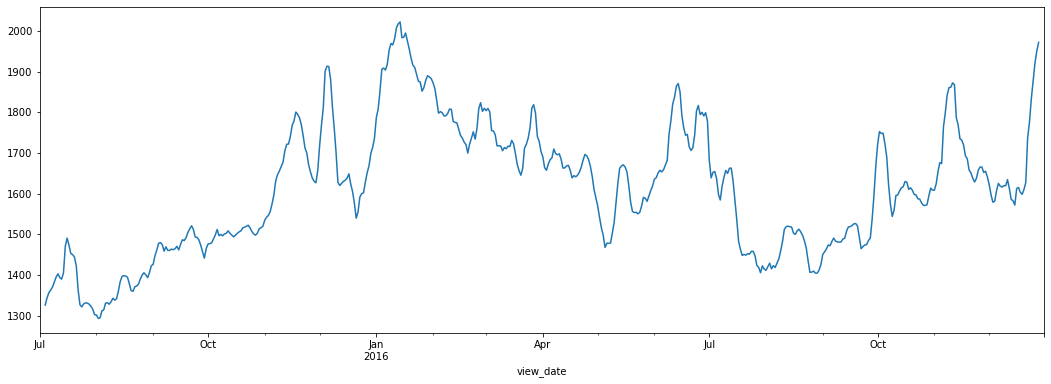

In [45]:
model.trend.plot(); 

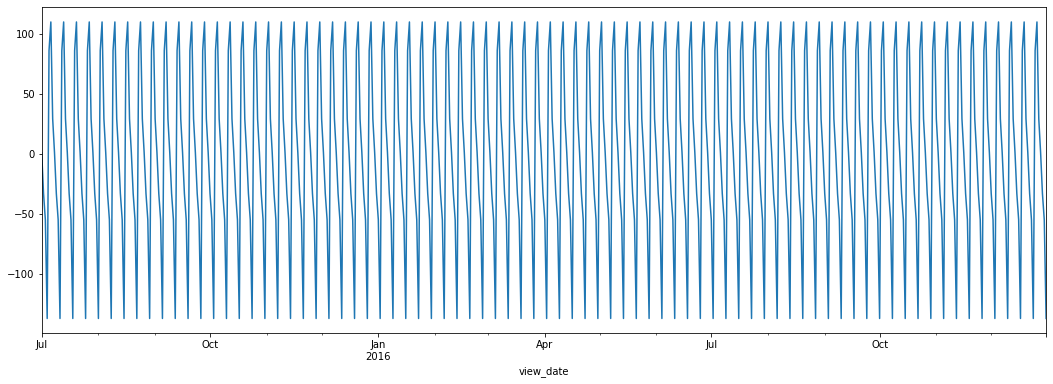

In [46]:
model.seasonal.plot();

#### Key Observation:

- A recurring pattern of four peaks/troughs monthly underscores a distinct weekly seasonality in the time series data.

#### Timeseries Decomposition Analysis for Spanish:

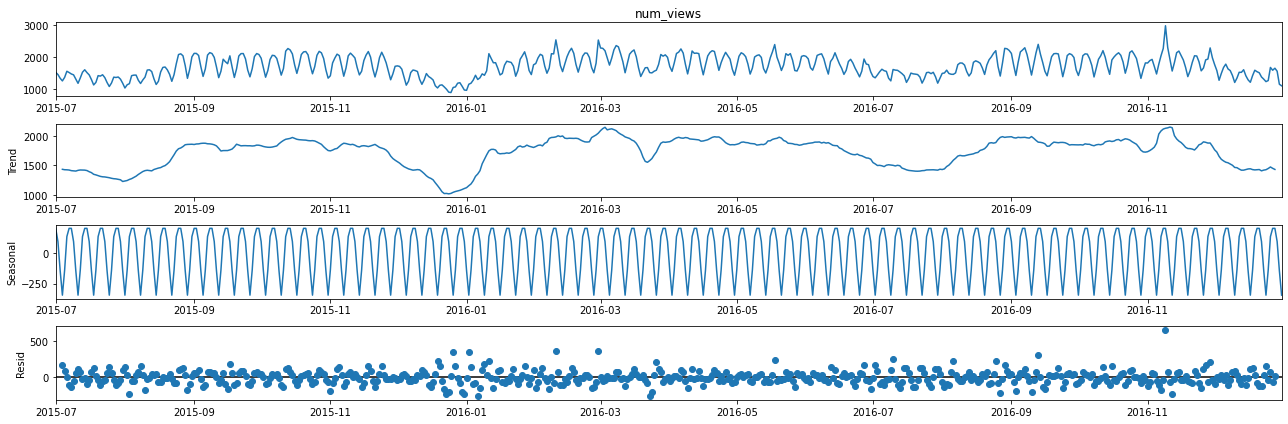

In [47]:
df_clean = get_lang_specific_cleaned_df(all_dfs[3]) 
df_clean.set_index('view_date', inplace=True) 

model = sm.tsa.seasonal_decompose(df_clean.num_views) 
model.plot(); 

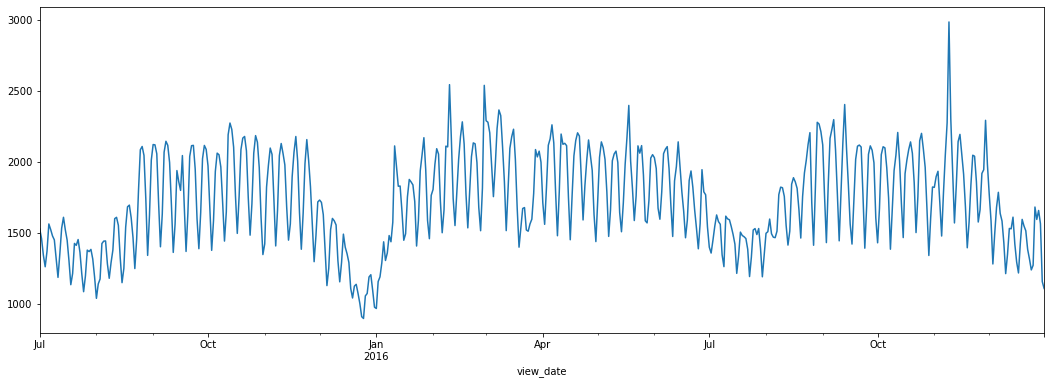

In [48]:
model.observed.plot();

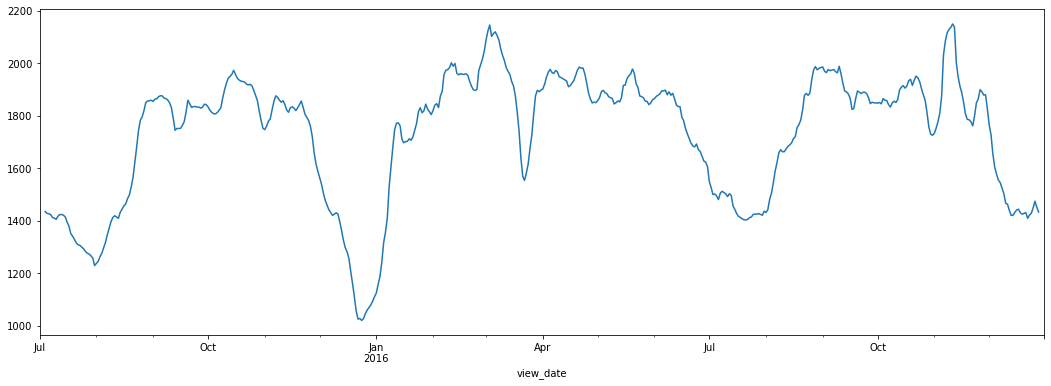

In [49]:
model.trend.plot(); 

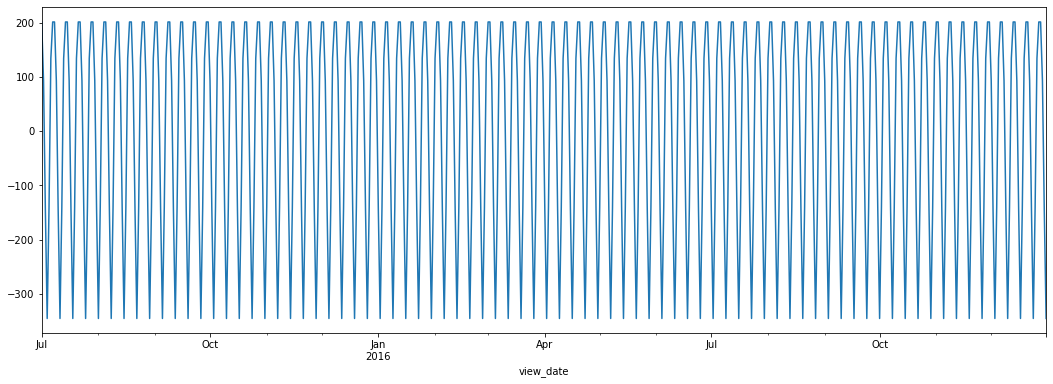

In [50]:
model.seasonal.plot(); 

#### Key Observation:

- A recurring pattern of four peaks/troughs monthly underscores a distinct weekly seasonality in the time series data.

#### Timeseries Decomposition Analysis for French:

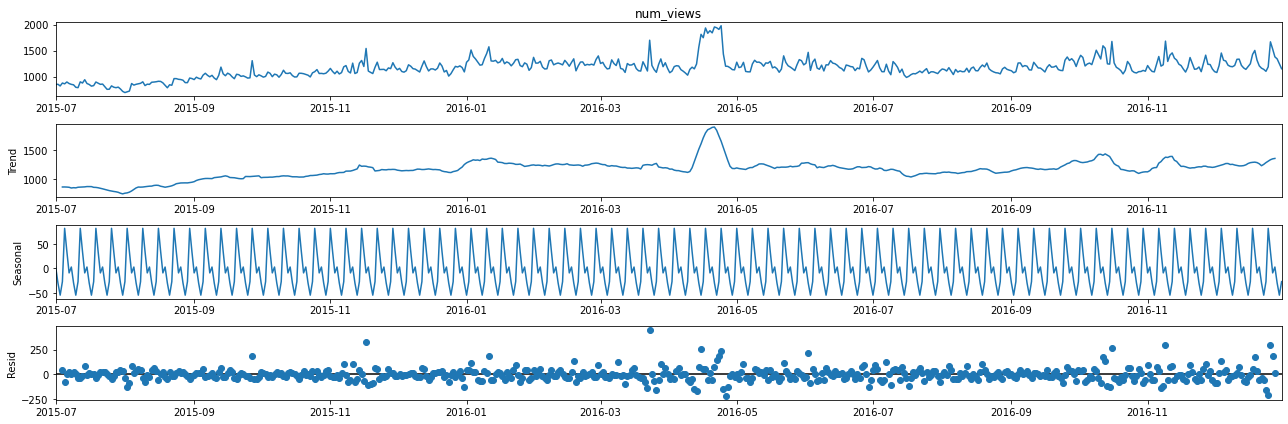

In [51]:
df_clean = get_lang_specific_cleaned_df(all_dfs[4]) 
df_clean.set_index('view_date', inplace=True) 

model = sm.tsa.seasonal_decompose(df_clean.num_views) 
model.plot();

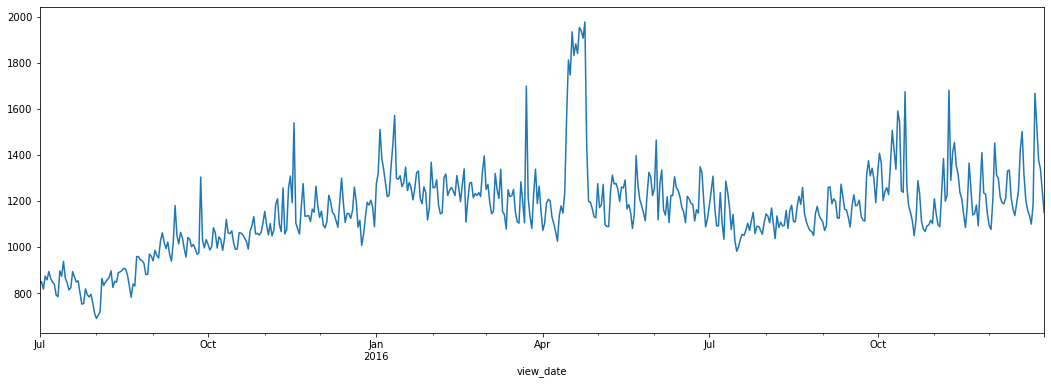

In [52]:
model.observed.plot(); 

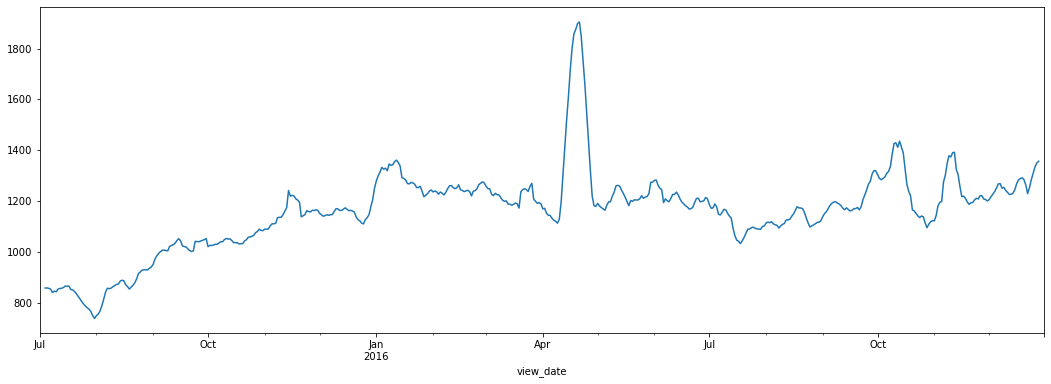

In [53]:
model.trend.plot();

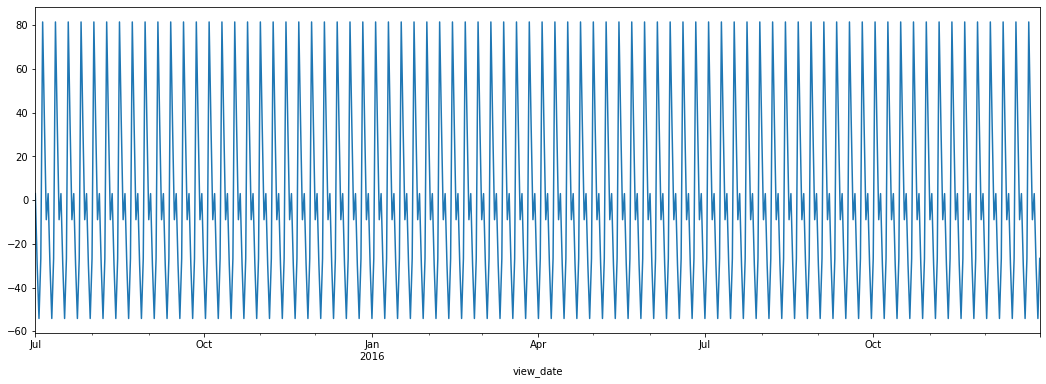

In [54]:
model.seasonal.plot(); 

#### Key Observation:

- A recurring pattern of four peaks/troughs monthly underscores a distinct weekly seasonality in the time series data.

#### Timeseries Decomposition aAnalysis for Japanese:

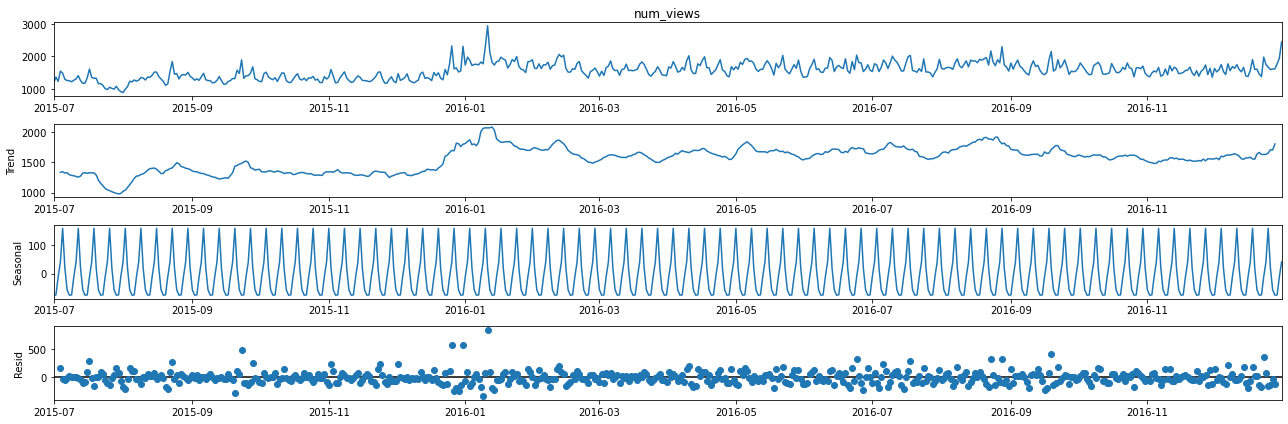

In [55]:
df_clean = get_lang_specific_cleaned_df(all_dfs[5]) 
df_clean.set_index('view_date', inplace=True) 

model = sm.tsa.seasonal_decompose(df_clean.num_views) 
model.plot();

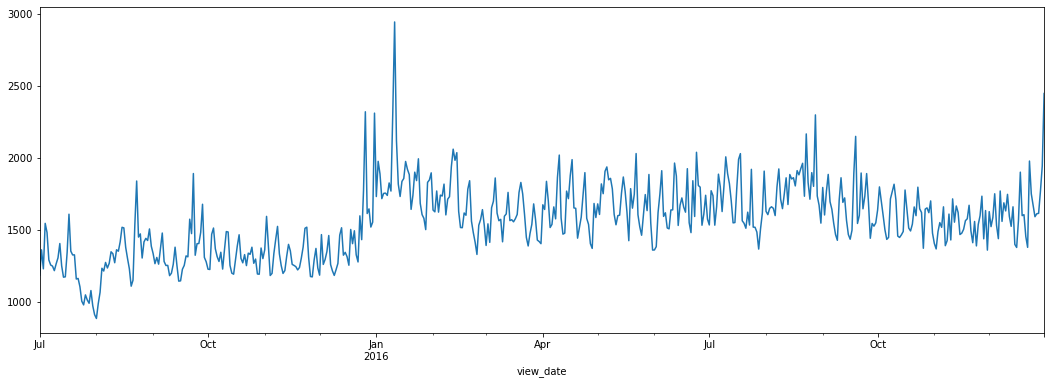

In [56]:
model.observed.plot(); 

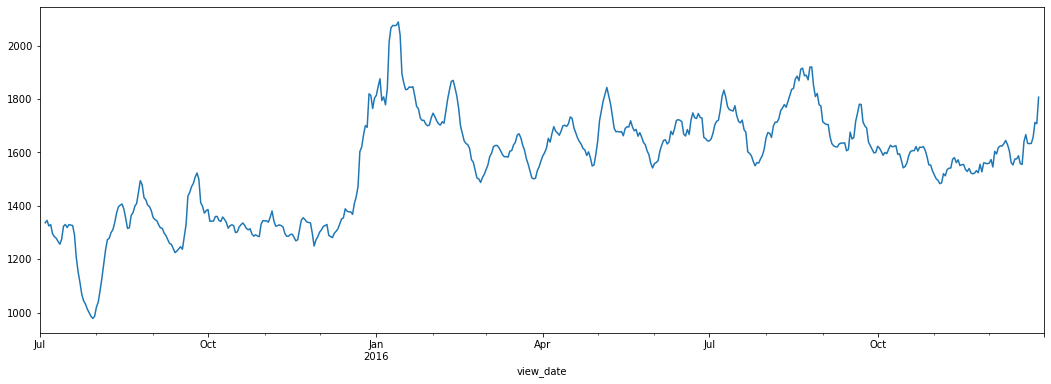

In [57]:
model.trend.plot(); 

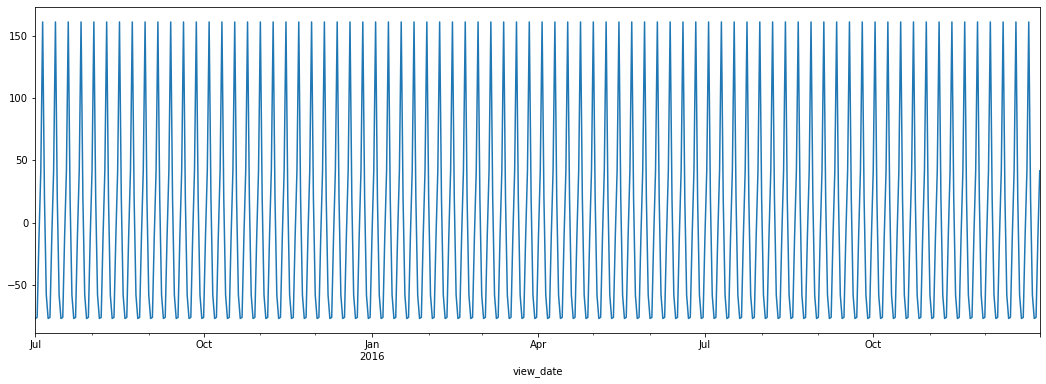

In [58]:
model.seasonal.plot(); 

#### Key Observation:

- A recurring pattern of four peaks/troughs monthly underscores a distinct weekly seasonality in the time series data.

#### Timeseries Decomposition Analysis for Russian:

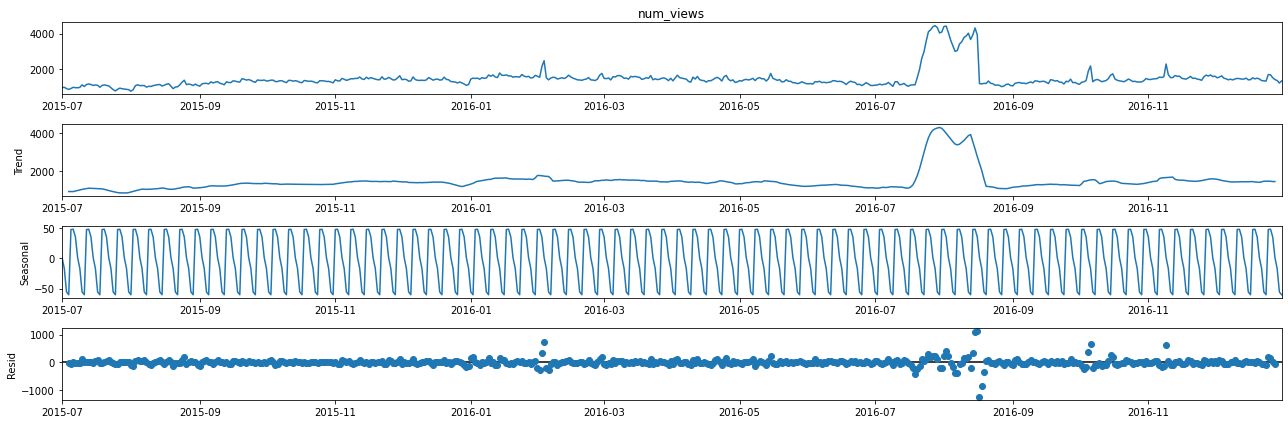

In [59]:
df_clean = get_lang_specific_cleaned_df(all_dfs[6]) 
df_clean.set_index('view_date', inplace=True) 

model = sm.tsa.seasonal_decompose(df_clean.num_views) 
model.plot(); 

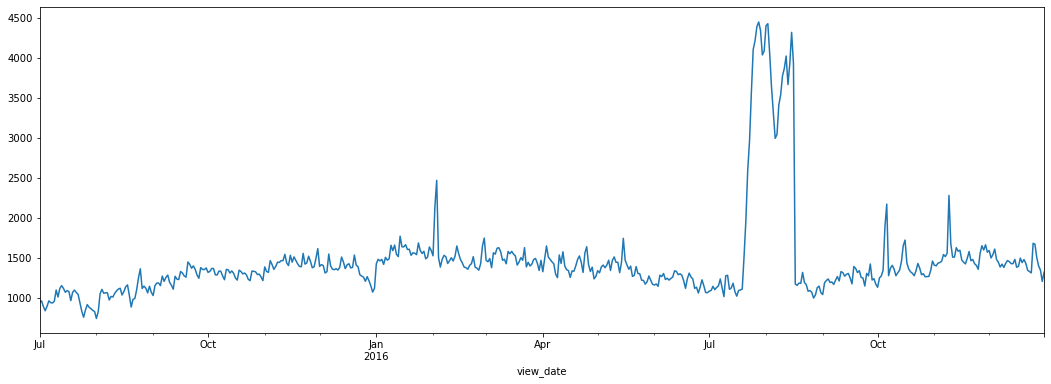

In [60]:
model.observed.plot(); 

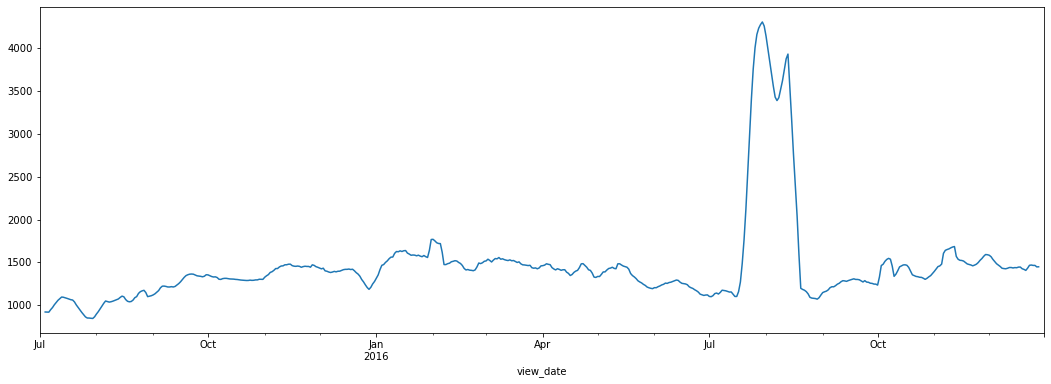

In [61]:
model.trend.plot();

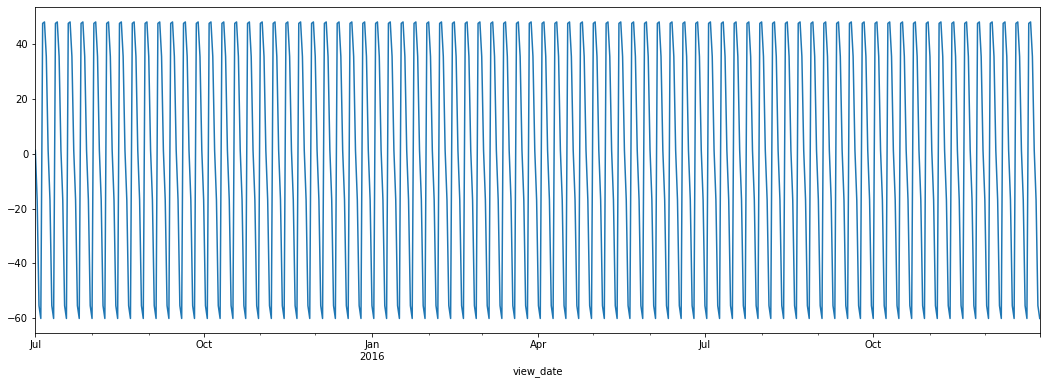

In [62]:
model.seasonal.plot();

#### Key Observation:

- A recurring pattern of four peaks/troughs monthly underscores a distinct weekly seasonality in the time series data.

#### Timeseries Decomposition Analysis for Chinese:

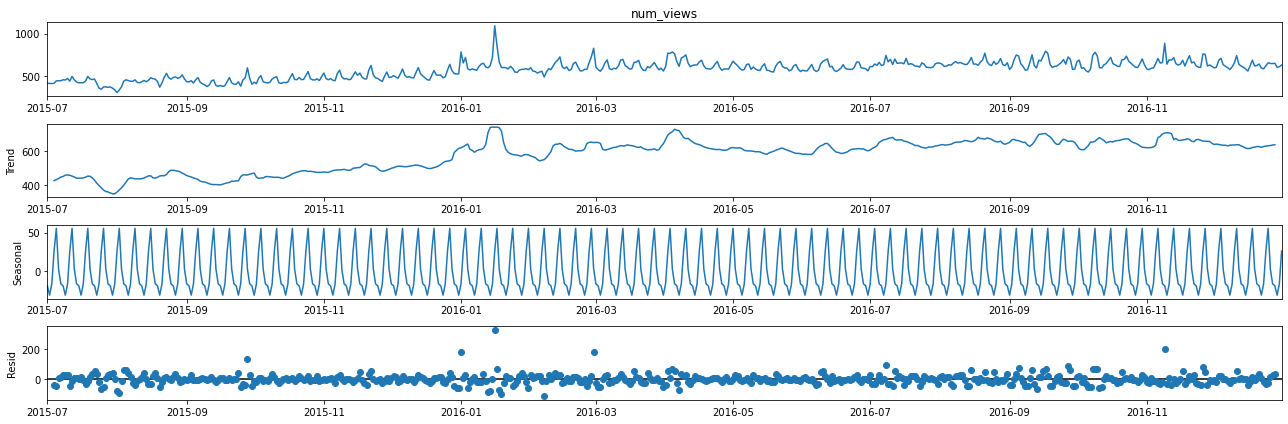

In [63]:
df_clean = get_lang_specific_cleaned_df(all_dfs[7]) 
df_clean.set_index('view_date', inplace=True) 

model = sm.tsa.seasonal_decompose(df_clean.num_views) 
model.plot(); 

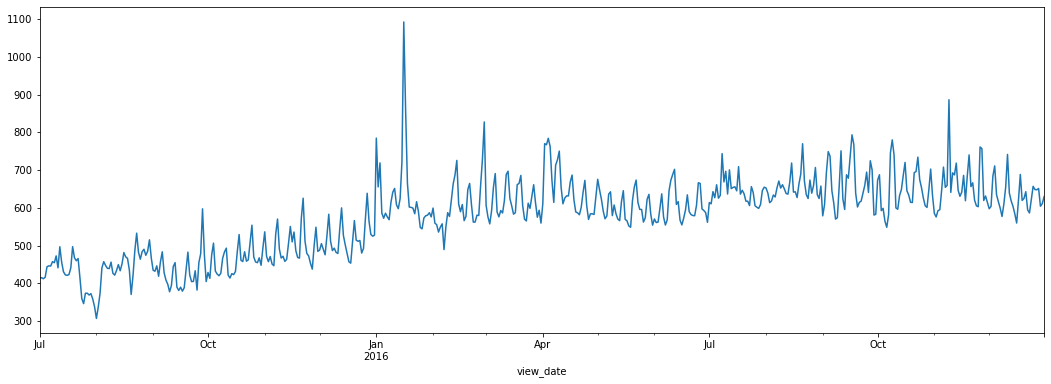

In [64]:
model.observed.plot(); 

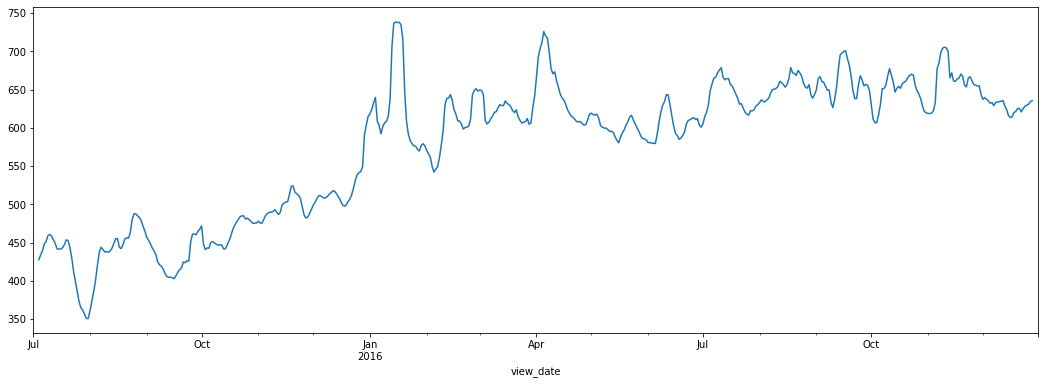

In [65]:
model.trend.plot(); 

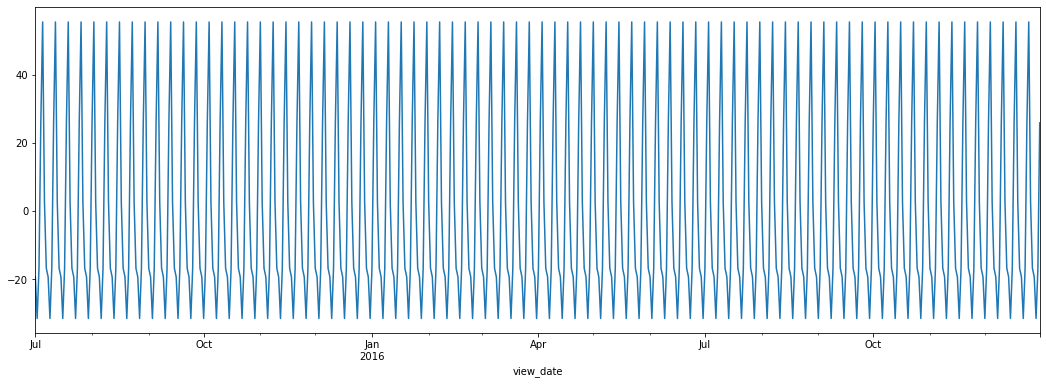

In [66]:
model.seasonal.plot(); 

#### Insights from Time Series Decomposition:

- English & Russian Pages: A notable surge in views during August 2016 suggests the influence of a campaign. Beyond this event, a consistent increasing trend punctuated by weekly seasonality is evident.
- Commons Language: Exhibits an upward trajectory, with a peak in September 2016, likely coinciding with a campaign alongside the English language. A weekly seasonal pattern is also present.
- German, Spanish & Japanese Pages: These time series are largely stationary, showing consistent weekly seasonality without significant upward or downward trends.
- French Pages: A distinct peak is observed around April-May 2016. Outside of this event, the time series remains stationary, marked by weekly seasonality.
- Chinese Pages: This series displays a steady upward trend, with weekly seasonality being a consistent feature.

## Stationarity Check:

#### The Augmented Dickey-Fuller (ADF) Test:

The Augmented Dickey-Fuller test is a widely used statistical test to check for stationarity in a time series. The essence of this test lies in its null hypothesis which posits that a unit root is present in the time series data, implying that the series is non-stationary. Conversely, the alternative hypothesis assumes that the time series is stationary.

When applying the ADF test, the primary metric to focus on is the \( p \)-value. Here's how to interpret the \( p \)-value:

- \( p \)-value \( \leq 0.05 \): We reject the null hypothesis, suggesting that the time series is stationary.
- \( p \)-value \( > 0.05 \): We fail to reject the null hypothesis, indicating that the time series is non-stationary.

By using `sm.tsa.stattools.adfuller`, one can easily obtain the \( p \)-value for the test, among other statistics.

In [67]:
def adf_test(data, sig_level=0.05): 
    p_val = sm.tsa.stattools.adfuller(data)[1] 
    if p_val < sig_level: 
        return "Stationary" 
    else: 
        return "Non Stationary"

In [68]:
for idx, language in enumerate([ 
    "English", "Common", "German", "Spanish", 
    "French", "Japanese", "Russian", "Chinese" 
    ]): 
    print(f"{language} language time series is {adf_test(get_lang_specific_cleaned_df(all_dfs[idx]).num_views)}") 

English language time series is Non Stationary
Common language time series is Non Stationary
German language time series is Non Stationary
Spanish language time series is Stationary
French language time series is Non Stationary
Japanese language time series is Non Stationary
Russian language time series is Stationary
Chinese language time series is Non Stationary


#### Key Observation: (Based on ADF Test):

1. **Spanish & Russian Pages**: The ADF test returns a \( p \)-value less than or equal to 0.05, confirming that these time series are stationary.
2. **Other Languages**: For other languages, the ADF test yields a \( p \)-value greater than 0.05, indicating non-stationarity. To enhance the reliability of further analyses, these non-stationary series need to be transformed into stationary ones.

#### Stationarizing by Decomposition:

In [69]:
for idx, language in enumerate([ 
    "English", "Common", "German", "Spanish", 
    "French", "Japanese", "Russian", "Chinese" 
    ]): 
    df_clean = get_lang_specific_cleaned_df(all_dfs[idx]) 
    df_clean.set_index('view_date', inplace=True) 
    model = sm.tsa.seasonal_decompose(df_clean.num_views) 
    series_with_trend_removed = model.observed - model.trend 
    adf_test_result = adf_test(series_with_trend_removed.dropna()) 
    
    print(f"After removing trend, {language} language time series has become {adf_test_result}") 

After removing trend, English language time series has become Stationary
After removing trend, Common language time series has become Stationary
After removing trend, German language time series has become Stationary
After removing trend, Spanish language time series has become Stationary
After removing trend, French language time series has become Stationary
After removing trend, Japanese language time series has become Stationary
After removing trend, Russian language time series has become Stationary
After removing trend, Chinese language time series has become Stationary


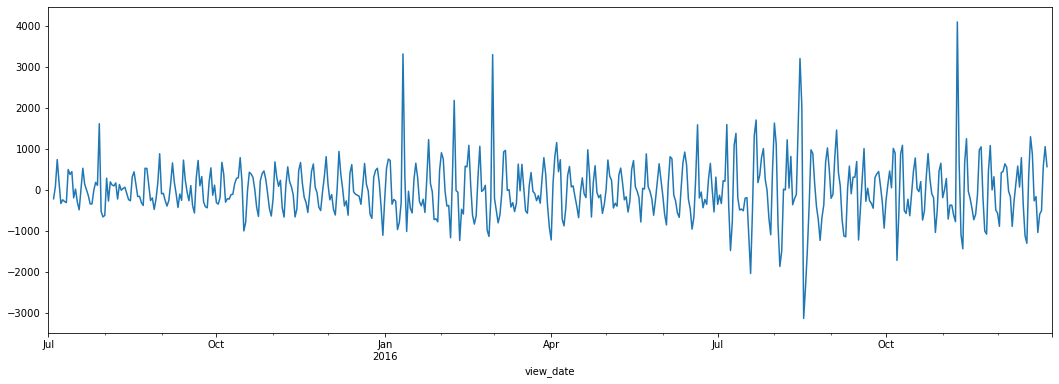

In [70]:
df_clean = get_lang_specific_cleaned_df(all_dfs[0]) 
df_clean.set_index('view_date', inplace=True) 

model = sm.tsa.seasonal_decompose(df_clean.num_views) 
series_with_trend_removed = model.observed - model.trend 
series_with_trend_removed.plot();

#### Stationarizing by Differencing:

In [71]:
for idx, language in enumerate([ 
    "English", "Common", "German", "Spanish", 
    "French", "Japanese", "Russian", "Chinese" 
    ]): 
    df_clean = get_lang_specific_cleaned_df(all_dfs[idx]) 
    df_clean.set_index('view_date', inplace=True) 
    diff_series = df_clean.num_views.diff(1) 
    adf_test_result = adf_test(diff_series.dropna()) 
    print(f"After differencing, {language} language time series has become {adf_test_result}") 

After differencing, English language time series has become Stationary
After differencing, Common language time series has become Stationary
After differencing, German language time series has become Stationary
After differencing, Spanish language time series has become Stationary
After differencing, French language time series has become Stationary
After differencing, Japanese language time series has become Stationary
After differencing, Russian language time series has become Stationary
After differencing, Chinese language time series has become Stationary


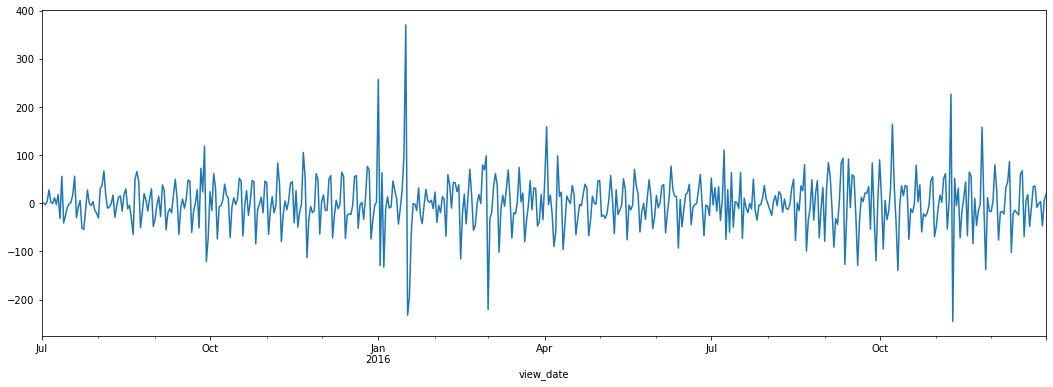

In [72]:
df_clean = get_lang_specific_cleaned_df(all_dfs[idx]) 
df_clean.set_index('view_date', inplace=True) 

diff_series = df_clean.num_views.diff(1) 
diff_series.plot(); 

## ACF & PACF Plots:

#### Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF):

Both ACF and PACF plots are invaluable tools in the time series analysis toolkit.

#### Autocorrelation Function (ACF):
- **Definition**: The ACF measures the correlation of a time series with its own lags. Essentially, it determines how a series is correlated with its past values.
- **Purpose**: ACF is primarily used to identify the Moving Average (MA) component of a time series. It helps to capture the overall correlation structure across different lags. If the ACF shows a gradual decline, it suggests the presence of an MA component in the series.

#### Partial Autocorrelation Function (PACF):
- **Definition**: The PACF measures the correlation of a time series with its lags, after removing the influence of intermediate lags. In simpler terms, it captures the direct correlation between an observation and its lag without the interference of other lags.
- **Purpose**: PACF is mainly used to identify the Autoregressive (AR) component of a time series. When the PACF displays a sharp cutoff after a specific lag, it indicates the presence of an AR component up to that lag.

#### Differences between ACF and PACF:
1. **Nature of Correlation**:
   - **ACF**: Reflects the combined correlation between observations and their lags.
   - **PACF**: Reflects the direct correlation between an observation and its lag, excluding the effect of other lags.

2. **Model Identification**:
   - **ACF**: Useful for identifying the MA (Moving Average) order, \(q\), in ARIMA modeling.
   - **PACF**: Crucial for pinpointing the AR (Autoregressive) order, \(p\), in ARIMA modeling.

3. **Visualization**:
   - **ACF**: Often showcases a gradual decline or a cut-off, indicating the correlation structure over lags.
   - **PACF**: Typically displays significant spikes at specific lags, indicating direct correlations at those lags, and drops off at others.

In time series analysis, both ACF and PACF plots are instrumental for model identification, especially for ARIMA where determining the order of AR and MA components is essential. They provide a visual means to understand the correlation structure and inform the analyst about potential model parameters.

In [73]:
def get_acf_plot(data, language): 
    df_clean = get_lang_specific_cleaned_df(data) 
    df_clean.set_index('view_date', inplace=True) 
    plot_acf(df_clean.num_views); 
    plt.title(f"ACF plot for {language} language") 
    plt.show() 

In [74]:
def get_pacf_plot(data, language): 
    df_clean = get_lang_specific_cleaned_df (data) 
    df_clean.set_index('view_date', inplace=True) 
    plot_pacf(df_clean.num_views); 
    plt.title(f"PACF plot for {language} language") 
    plt.show()

#### English Language:

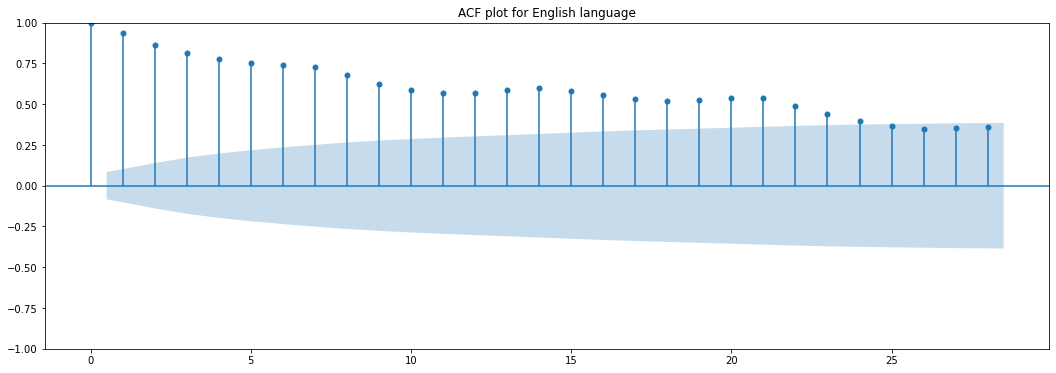

In [75]:
get_acf_plot(all_dfs[0], "English") 

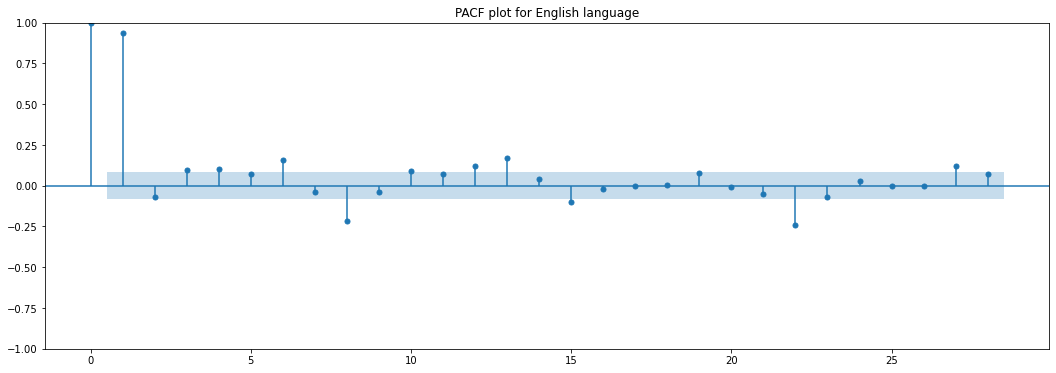

In [76]:
get_pacf_plot(all_dfs[0], "English") 

#### Key Observation:

- The current prediction demonstrates a significant positive correlation with only one previous value, indicating the presence of an autoregressive component of order 1.

#### Commons:

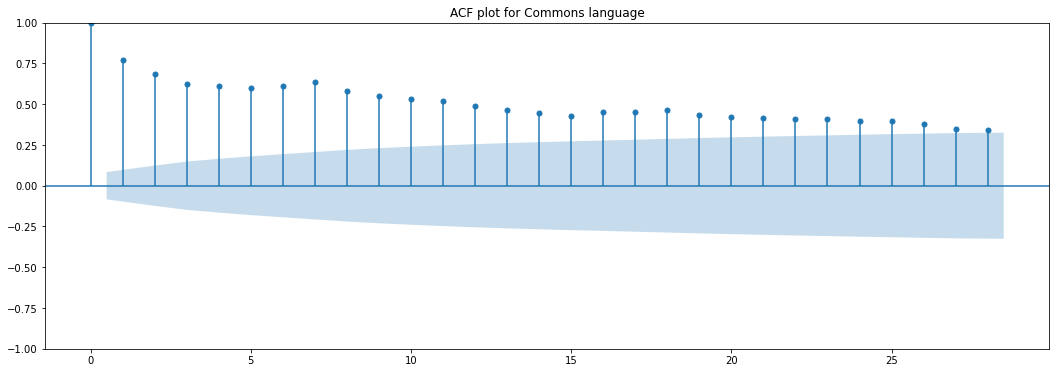

In [77]:
get_acf_plot(all_dfs[1], "Commons")

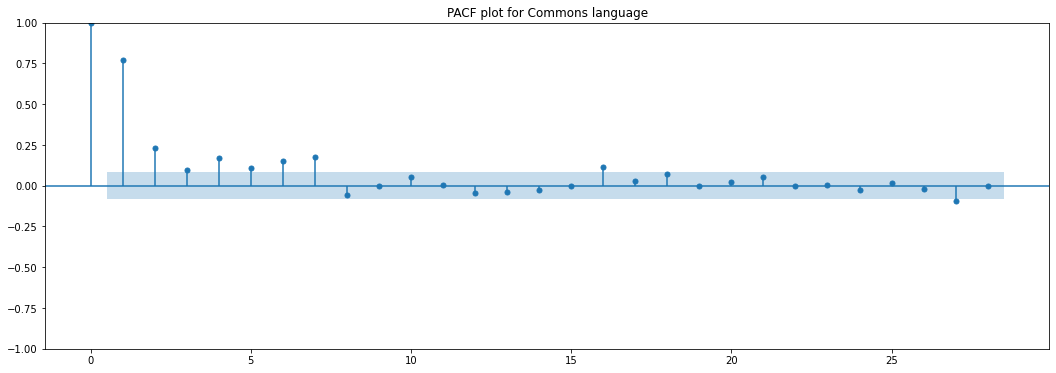

In [78]:
get_pacf_plot(all_dfs[1], "Commons")

#### Key Observation:

- The current prediction demonstrates a significant positive correlation with two previous values, indicating the presence of an autoregressive component of order 2.

#### German Language:

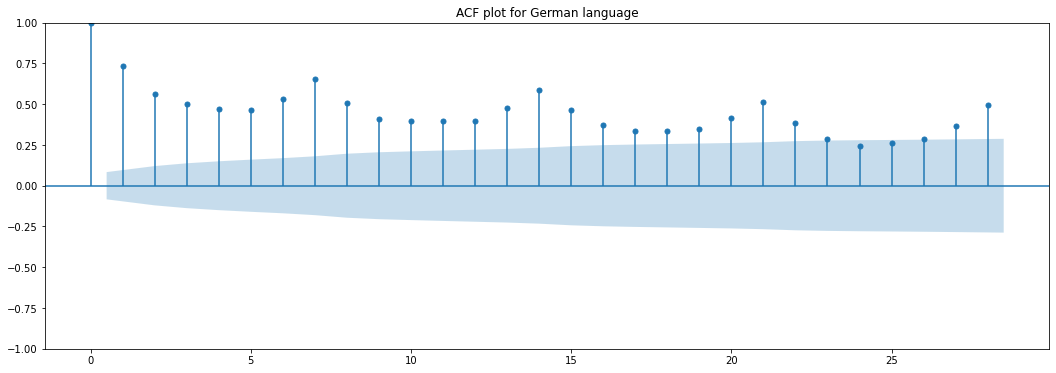

In [79]:
get_acf_plot(all_dfs[2], "German") 

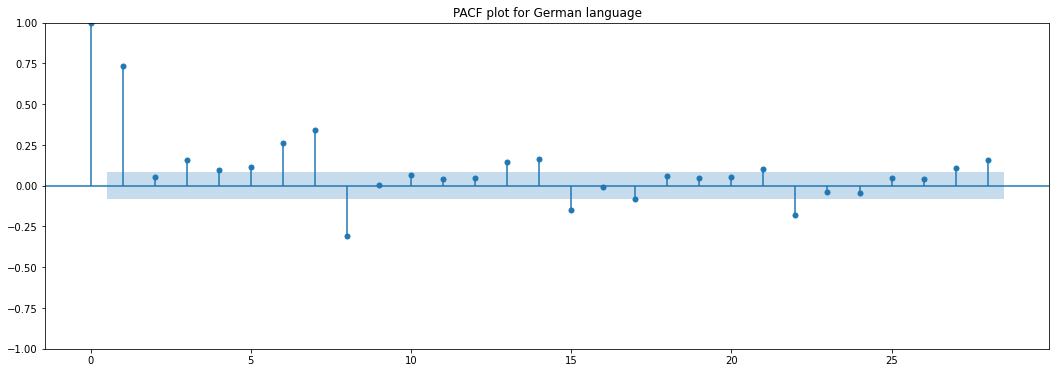

In [80]:
get_pacf_plot(all_dfs[2], "German") 

#### Key Observation:

- The current prediction demonstrates a significant positive correlation with only one previous value, indicating the presence of an autoregressive component of order 1.

#### Spanish Language:

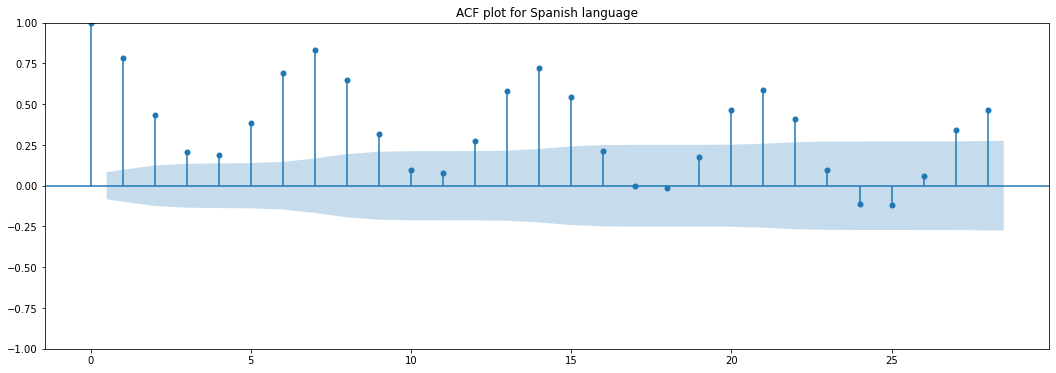

In [81]:
get_acf_plot(all_dfs[3], "Spanish") 

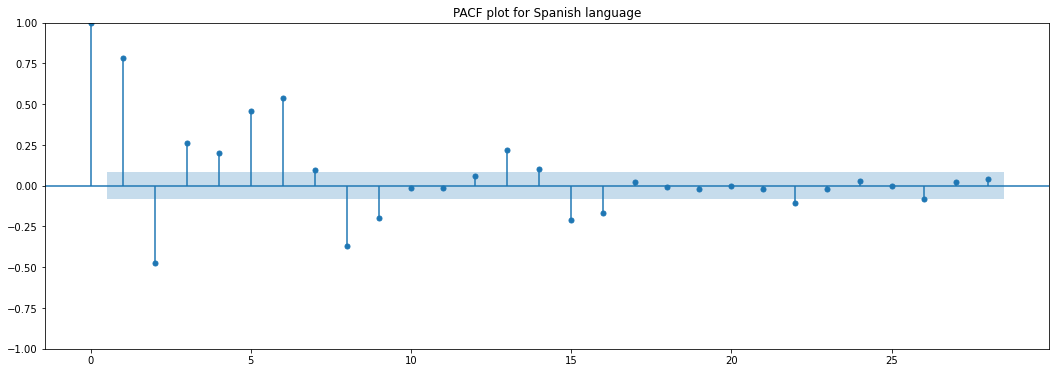

In [82]:
get_pacf_plot(all_dfs[3], "Spanish") 

#### Key Observation:

- The current prediction demonstrates significant correlations with six previous values, indicating the presence of an autoregressive component of order 6.

#### French Language:

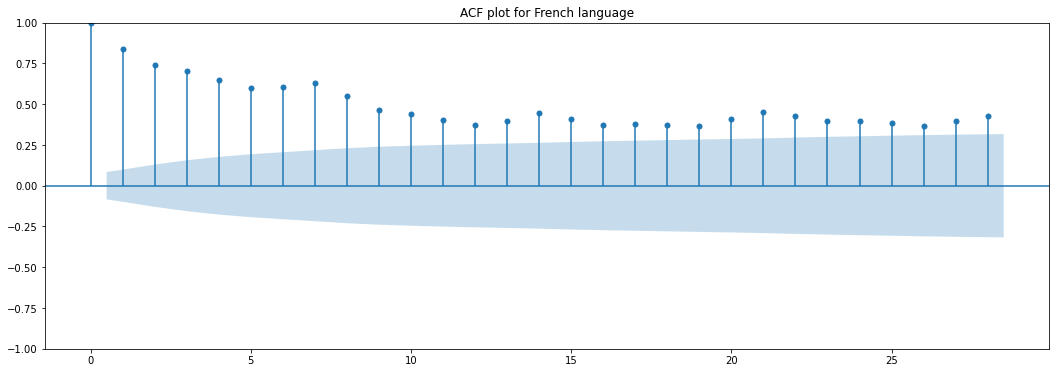

In [83]:
get_acf_plot(all_dfs[4], "French") 

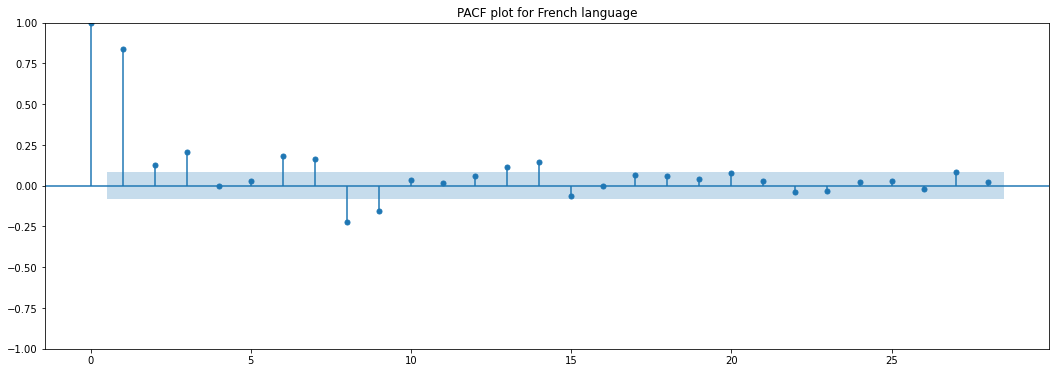

In [84]:
get_pacf_plot(all_dfs[4], "French") 

#### Key Observation:

- The current prediction demonstrates a significant positive correlation with only one previous value, indicating the presence of an autoregressive component of order 1.

#### Japanese Language:

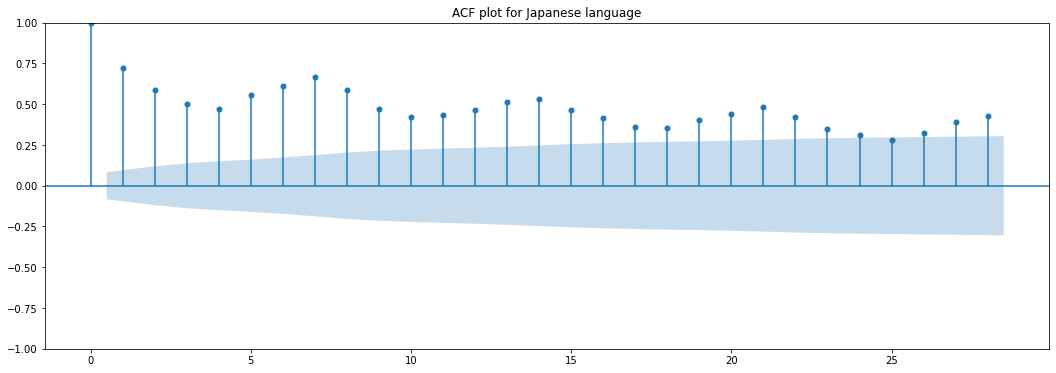

In [85]:
get_acf_plot(all_dfs[5], "Japanese") 

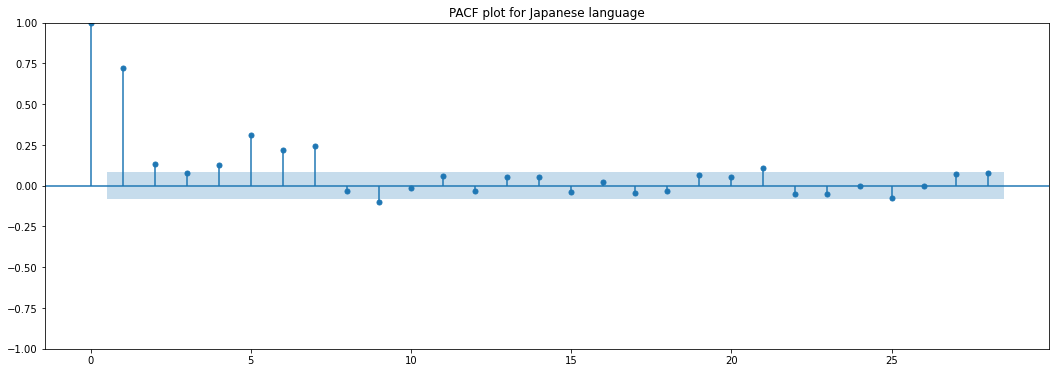

In [86]:
get_pacf_plot(all_dfs[5], "Japanese") 

#### Key Observation:

- The current prediction demonstrates a significant positive correlation with two previous values, indicating the presence of an autoregressive component of order 2.

#### Russian Language:

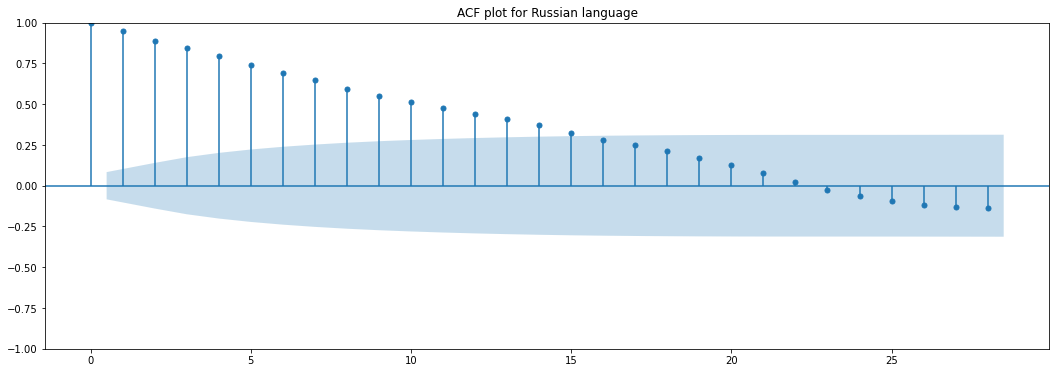

In [87]:
get_acf_plot(all_dfs[6], "Russian") 

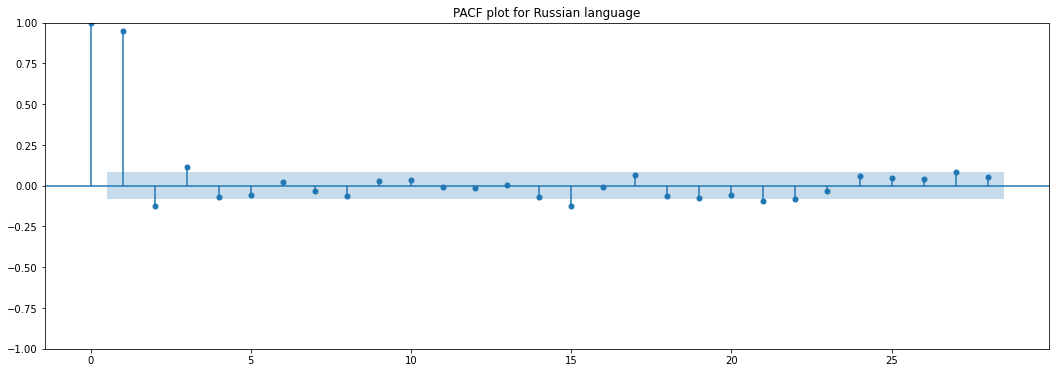

In [88]:
get_pacf_plot(all_dfs[6], "Russian") 

#### Key Observation:

- The current prediction demonstrates a significant positive correlation with only one previous value, indicating the presence of an autoregressive component of order 1.

#### Chinese Language:

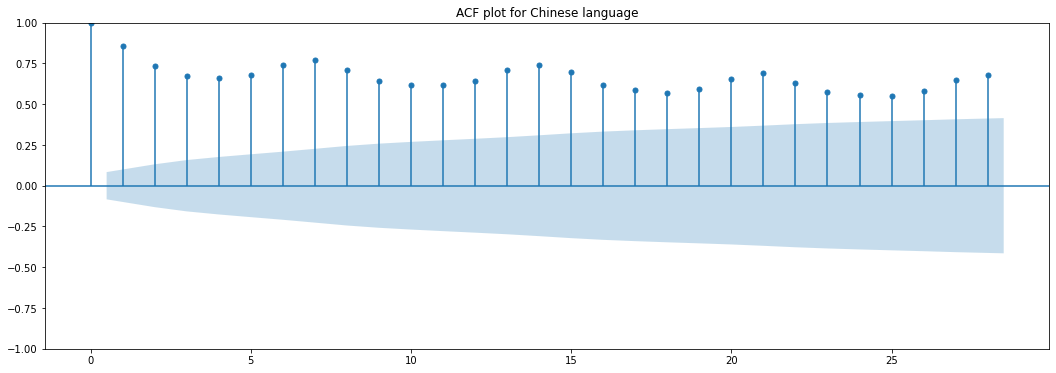

In [89]:
get_acf_plot(all_dfs[7], "Chinese") 

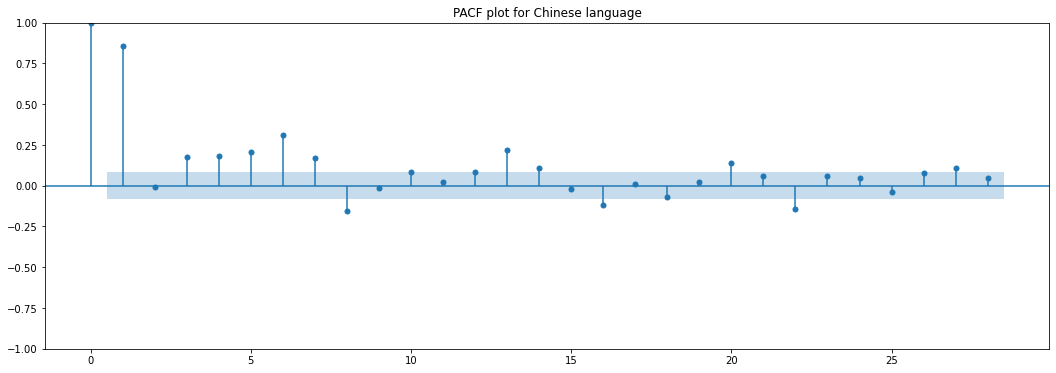

In [90]:
get_pacf_plot(all_dfs[7], "Chinese") 

#### Key Observation:

- The current prediction demonstrates a significant positive correlation with only one previous value, indicating the presence of an autoregressive component of order 1.

## Modelling:

In [91]:
def display_mape(data): 
    return mean_absolute_percentage_error(data['num_views'], data['pred_num_views']).round(3)

#### [ Train | Cross Validation | Test ] split:

In [92]:
def get_train_cv_test_split(data): 
    df_train = data.loc[data.view_date <= '2016-10-31'] 
    df_cv = data.loc[(data.view_date >= '2016-11-01') & (data.view_date <= '2016-11-30')] 
    df_test = data.loc[(data.view_date >= '2016-12-01') & (data.view_date <= '2016-12-31')]
    
    df_train.set_index('view_date',inplace=True) 
    df_cv.set_index('view_date',inplace=True) 
    df_test.set_index('view_date',inplace=True) 
    return df_train, df_cv, df_test 

In [93]:
df_train, df_cv, df_test = get_train_cv_test_split(get_lang_specific_cleaned_df(all_dfs[0]))

#### ARIMA Model:

In [94]:
def perform_grid_search_arima(train_data, cv_data): 
    all_ps = [1, 2, 3, 4, 5, 6, 7] 
    all_qs = [1, 2, 3, 4, 5, 6, 7] 
    all_ds = [1, 2, 3] 
    
    perf_dict = {} 
    
    for p in all_ps: 
        for q in all_qs: 
            for d in all_ds: 
                model = SARIMAX( 
                    train_data.num_views, 
                    order=(p, d, q) 
                ).fit(disp=False) 
                cv_data['pred_num_views'] = model.forecast(30) 
                perf_dict[(p,d,q)] = display_mape(cv_data) 
    
    sorted_perf_dict = sorted(perf_dict.items(), key=lambda x: x[1]) 
    return sorted_perf_dict[0] 

In [95]:
best_pdq, best_mape = perform_grid_search_arima(df_train.copy(), df_cv.copy()) 

In [96]:
print(f"Best P,D,Q = {best_pdq} \nBest MAPE = {best_mape}") 

Best P,D,Q = (1, 1, 1) 
Best MAPE = 0.072


MAPE: 0.072


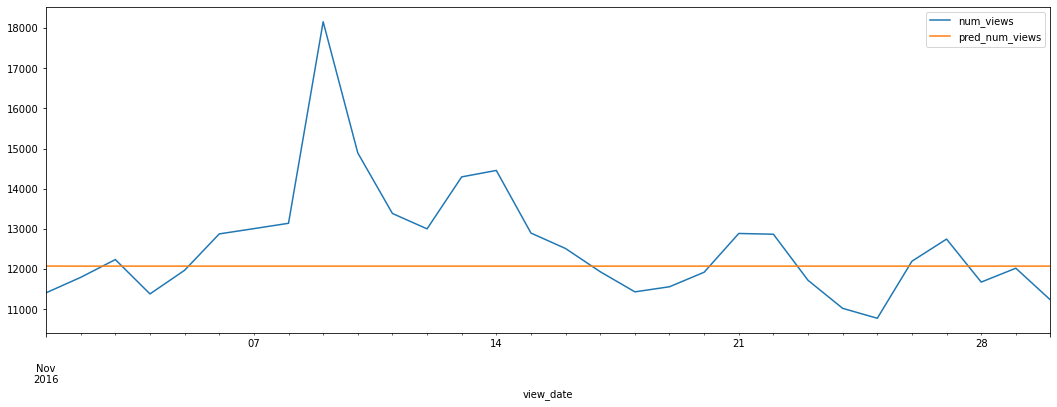

In [97]:
model = SARIMAX(df_train.num_views, order=(1, 1, 1)).fit(disp=False) 
df_cv['pred_num_views'] = model.predict( 
    start=df_cv.index[0], 
    end=df_cv.index[-1] 
)
print(f"MAPE: {display_mape(df_cv)}") 
df_cv.plot(); 

#### SARIMAX Model:

In [98]:
df_eng = get_lang_specific_cleaned_df(all_dfs[0]) 
df_eng['campaign'] = df_exog['Exog'] 
df_train, df_cv, df_test = get_train_cv_test_split(df_eng) 

In [99]:
df_train[df_train['campaign'] == 1]

num_views  campaign
view_date                       
2015-07-29  10099.7661         1
2016-01-11  14654.8917         1
2016-01-12  11784.2302         1
2016-02-08  13255.8749         1
2016-02-29  14540.9236         1
2016-07-20  13635.9490         1
2016-07-21  16739.1230         1
2016-07-22  18463.0658         1
2016-07-23  18256.8571         1
2016-07-24  19260.2169         1
2016-07-25  20022.3756         1
2016-07-26  20206.2970         1
2016-07-27  19362.3067         1
2016-07-28  19035.1747         1
2016-07-29  18271.3221         1
2016-07-30  17629.6177         1
2016-07-31  18832.3350         1
2016-08-01  19414.4902         1
2016-08-02  18536.0412         1
2016-08-03  16503.0269         1
2016-08-04  15327.1108         1
2016-08-05  15696.6484         1
2016-08-06  17225.0296         1
2016-08-07  17665.2788         1
2016-08-08  19377.8447         1
2016-08-09  18675.3021         1
2016-08-10  19700.1168         1
2016-08-11  18782.2757         1
2016-08-12  19022.0628         1
2016-08-13  18984.4276         1
2016-08-14  19486.6563         1
2016-08-15  20025.7042         1
2016-08-16  17698.0044         1
2016-08-24  10813.2509         1
2016-08-25  10430.4843         1
2016-08-26  10133.7305         1
2016-08-27  11160.3790         1
2016-08-28  12016.4861         1
2016-08-29  13646.1516         1
2016-08-30  14638.9939         1
2016-08-31  14701.4811         1
2016-09-01  14507.9555         1
2016-09-02  14652.6593         1
2016-09-03  15313.4978         1
2016-09-04  15554.9297         1
2016-09-05  13981.5331         1
2016-09-06  13037.2696         1

#### Key Observation:

- Campaign Duration Anomalies:
  - Campaigns usually span 2-3 days monthly.
  - August 2016: Campaign ran for the entire month.
  - September 2016: Extended to 6 days.
  - Noteworthy: A coinciding spike in English and Russian webpage views during this deviation. This anomaly may have driven the increased traffic.

In [100]:
def perform_grid_search_sarimax(train_data, cv_data): 
    p = q = d = D = 1 
    S = 7 
    all_Ps = [1, 2, 3] 
    all_Qs = [1, 2, 3] 
    
    perf_dict = {} 
    
    for P in all_Ps: 
        for Q in all_Qs: 
            model = SARIMAX( 
                train_data.num_views, 
                exog=train_data.campaign, 
                order=(p, d, q), 
                seasonal_order=(P, D, Q, S),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(disp=False) 
            cv_data['pred_num_views'] = model.predict( 
                start = cv_data.index[0], 
                end = cv_data.index[-1], 
                exog = cv_data[['campaign']] 
            ) 
            perf_dict[(P,D,Q)] = display_mape(cv_data) 
            
    sorted_perf_dict = sorted(perf_dict.items(), key=lambda x: x[1]) 
    return sorted_perf_dict[0] 

In [101]:
best_pdq, best_mape = perform_grid_search_sarimax(df_train.copy(), df_cv.copy()) 
print(f"Best P, D, Q : {best_pdq} \nBest MAPE : {best_mape}")

Best P, D, Q : (3, 1, 1) 
Best MAPE : 0.057


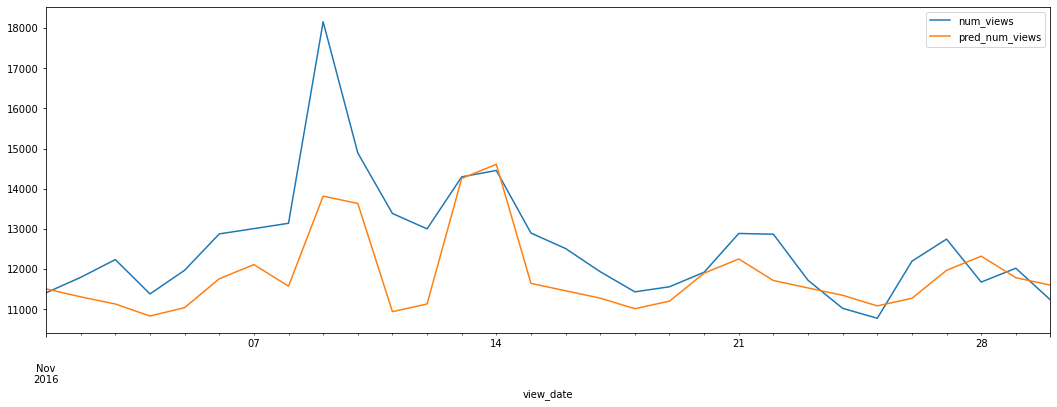

In [102]:
model = SARIMAX( 
        df_train.num_views, 
        exog=df_train.campaign, 
        order=(3, 1, 1), 
        seasonal_order=(1, 1, 1, 7) 
        ).fit(disp=False) 
df_cv['pred_num_views'] = model.predict( 
    start = df_cv.index[0], 
    end = df_cv.index[-1], 
    exog = df_cv[['campaign']] 
) 

df_cv.drop(columns=['campaign'], inplace=True) 
df_cv.plot(); 

In [108]:
df_train, df_cv, df_test = get_train_cv_test_split(df_eng) 
df_train_cv = pd.concat([df_train, df_cv])

Test MAPE = 0.044


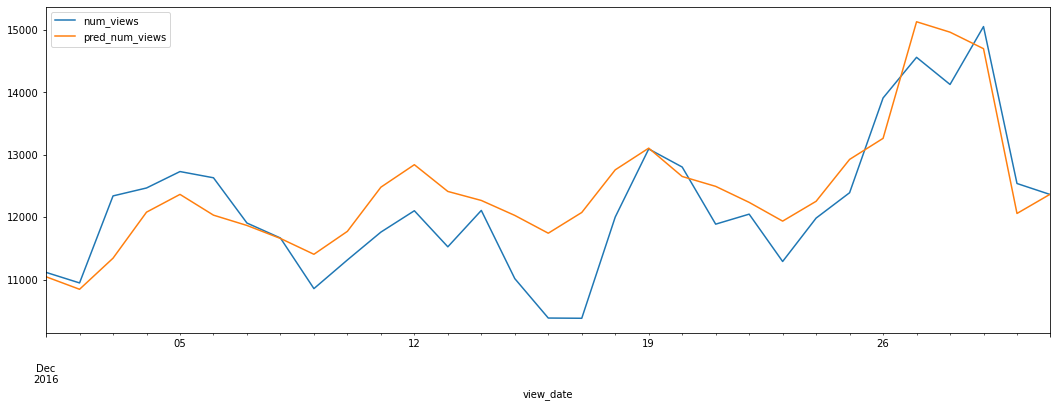

In [109]:
model = SARIMAX( 
        df_train_cv.num_views, 
        exog=df_train_cv.campaign, 
        order=(1, 1, 1), 
        seasonal_order=(1, 1, 1, 7) 
    ).fit(disp=False) 

df_test['pred_num_views'] = model.predict( 
    start = df_test.index[0], 
    end = df_test.index[-1], 
    exog = df_test[['campaign']] 
) 

df_test.drop(columns=['campaign'], inplace=True) 
print (f"Test MAPE = {display_mape(df_test)}") 
df_test.plot();

#### Pipeline for different Languages Series:

#### Note on Hyperparameter Selection in Analysis:

- In our current analysis, we chose a uniform set of hyperparameters across all time series to streamline the process. While this approach is efficient, it's worth noting that optimal forecasting performance typically necessitates individualized hyperparameter tuning for each specific time series. Thus, for best results, separate hyperparameter tuning for each time series is recommended.

In [110]:
def forecast_and_get_train_cv_test_mapes (language, data_train_cv, data_test): 
    p = 1
    d = q = P = D = Q = 1 
    S = 7 
    model = SARIMAX( 
            data_train_cv.num_views, 
            order=(p, d, q), 
            seasonal_order=(P, D, Q, S) 
        ).fit(disp=False) 
    data_test['pred_num_views'] = model.predict( 
                                    start = data_test.index[0], 
                                    end = data_test.index[-1] 
                                 ) 
    print(f"Language : {language}") 
    print(f"MAPE : {display_mape(data_test)}") 
    print()

In [111]:
for idx, language in enumerate([ 
        "English", "Common", "German", "Spanish", 
        "French", "Japanese", "Russian", "Chinese" 
    ]): 
    df_train, df_cv, df_test = get_train_cv_test_split( 
        get_lang_specific_cleaned_df(all_dfs[idx]) 
    ) 
    
    df_train_cv = pd.concat([df_train, df_cv]) 
    forecast_and_get_train_cv_test_mapes(language, df_train_cv, df_test) 

Language : English
MAPE : 0.071

Language : Common
MAPE : 0.108

Language : German
MAPE : 0.076

Language : Spanish
MAPE : 0.276

Language : French
MAPE : 0.074

Language : Japanese
MAPE : 0.083

Language : Russian
MAPE : 0.104

Language : Chinese
MAPE : 0.071



#### Key Observation:
- The MAPE for the majority of languages is within the acceptable range of ≤10%.
- An outlier is observed for the Spanish language, which has a MAPE exceeding this threshold.
- To enhance forecasting accuracy for Spanish, individual hyperparameter tuning is recommended, which could lead to a reduced MAPE

#### Facebook Prophet :

In [112]:
def display_mape_prophet(data): 
    return mean_absolute_percentage_error(data['y'], data['yhat']).round(3)

In [113]:
df_train, df_cv, df_test = get_train_cv_test_split(get_lang_specific_cleaned_df(all_dfs[0])) 
                                                   
df_train = df_train.reset_index() 
df_train.rename(columns={'view_date' : 'ds', 'num_views' : 'y'}, inplace=True) 
                                                   
df_cv = df_cv.reset_index() 
df_cv.rename(columns={'view_date' : 'ds', 'num_views' : 'y'}, inplace=True) 
                                                   
df_test = df_test.reset_index() 
df_test.rename(columns={'view_date' : 'ds', 'num_views' : 'y'}, inplace=True) 

In [114]:
model = Prophet() 
model.fit(df_train)

21:03:02 - cmdstanpy - INFO - Chain [1] start processing
21:03:03 - cmdstanpy - INFO - Chain [1] done processing


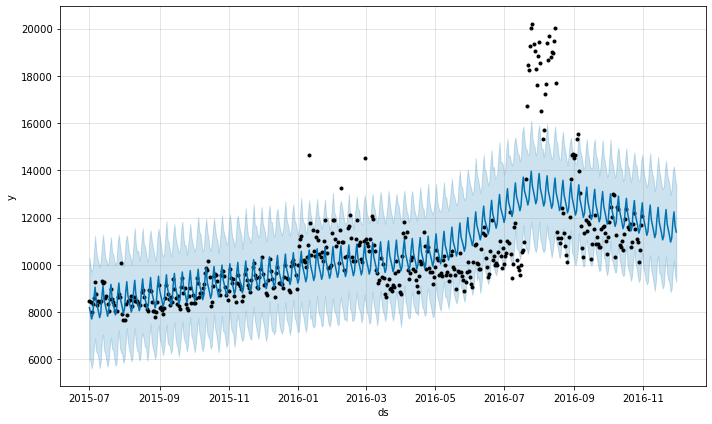

In [115]:
future = model.make_future_dataframe(periods=30,freq="D") 
forecast = model.predict(future) 
fig = model.plot(forecast) 

In [116]:
def get_prediction_and_mapes_through_prophet (language, data_train_cv, data_test): 
    model = Prophet(daily_seasonality=True, weekly_seasonality=True) 
    model.fit(data_train_cv) 
    
    future = model.make_future_dataframe(periods=31, freq="D") 
    forecast = model.predict(future) 
    data_test['yhat'] = forecast[-31:]['yhat'].reset_index(drop=True) 
    
    return language, display_mape_prophet(data_test)

In [117]:
lang_mape_dict = {} 
for idx, language in enumerate([ 
        "English", "Common", "German", "Spanish", 
        "French", "Japanese", "Russian", "Chinese" 
    ]): 
    df_train, df_cv, df_test = get_train_cv_test_split( 
        get_lang_specific_cleaned_df(all_dfs[idx]) 
    ) 
    df_train = df_train.reset_index() 
    df_train.rename(columns={'view_date' : 'ds', 'num_views' : 'y'}, inplace=True) 
    
    df_cv = df_cv.reset_index() 
    df_cv.rename(columns={'view_date' : 'ds', 'num_views' : 'y'}, inplace=True) 
                          
    df_test = df_test.reset_index() 
    df_test.rename(columns={'view_date' : 'ds', 'num_views' : 'y'}, inplace=True) 
                          
    df_train_cv = pd.concat([df_train, df_cv]) 
    lang, mape = get_prediction_and_mapes_through_prophet (language, df_train_cv, df_test) 
    
    lang_mape_dict[lang] = mape

21:03:44 - cmdstanpy - INFO - Chain [1] start processing
21:03:44 - cmdstanpy - INFO - Chain [1] done processing
21:03:44 - cmdstanpy - INFO - Chain [1] start processing
21:03:44 - cmdstanpy - INFO - Chain [1] done processing
21:03:44 - cmdstanpy - INFO - Chain [1] start processing
21:03:44 - cmdstanpy - INFO - Chain [1] done processing
21:03:45 - cmdstanpy - INFO - Chain [1] start processing
21:03:45 - cmdstanpy - INFO - Chain [1] done processing
21:03:45 - cmdstanpy - INFO - Chain [1] start processing
21:03:45 - cmdstanpy - INFO - Chain [1] done processing
21:03:45 - cmdstanpy - INFO - Chain [1] start processing
21:03:45 - cmdstanpy - INFO - Chain [1] done processing
21:03:46 - cmdstanpy - INFO - Chain [1] start processing
21:03:46 - cmdstanpy - INFO - Chain [1] done processing
21:03:46 - cmdstanpy - INFO - Chain [1] start processing
21:03:46 - cmdstanpy - INFO - Chain [1] done processing


In [118]:
for lang, mape in lang_mape_dict.items(): 
    print(f"MAPE for {lang} language : {mape}") 

MAPE for English language : 0.062
MAPE for Common language : 0.111
MAPE for German language : 0.083
MAPE for Spanish language : 0.354
MAPE for French language : 0.068
MAPE for Japanese language : 0.083
MAPE for Russian language : 0.049
MAPE for Chinese language : 0.068


## Summary:

In our recent analysis of multilingual webpage views, we delved deep into the intricacies of time series forecasting. Our primary objective was to predict the volume of future views for web pages in various languages, providing actionable insights to optimize advertisement placements. Here's a detailed breakdown of our findings and recommendations:

## Insights:

### 1. Problem Statement and Broader Applications:

- **Primary Objective**: Leveraging advanced time series forecasting methodologies, we aim to predict the volume of webpage views across different languages. This predictive insight will be instrumental for our client in strategically positioning advertisements.
  
- **Extended Applications**: 
  - **Product Demand Forecasting**: For instance, predicting the demand for tech products, such as iPhones, allows manufacturers to optimize their supply chain, ensuring timely procurement of components and effective labor allocation.
  - **Financial Market Forecasts**: An analogous application is in predicting financial market movements, equipping investors with the foresight to optimize their portfolios.

### 2. Data Visualization Insights:

- **English Content Dominance**: A prominent trend that surfaced is the overarching preference for English content. Webpages in English consistently outperform those in other languages, signifying a global demand for English-based content.
  
- **Impact of Marketing Campaigns**: Our analysis underscored the efficacy of marketing campaigns. There's a tangible surge in both sales and page views during campaign windows, establishing a strong positive correlation between promotional efforts and user engagement.
  
- **Weekly Behavior Patterns**: A recurrent weekly seasonality was evident in webpage views. This likely mirrors the global user behavior nuances, with certain days of the week fostering more active browsing habits.

### 3. Time Series Decomposition:

- **Decomposition Rationale**: A crucial aspect of our analysis was decomposing the time series data. By segregating the series into Trend, Seasonality, and Residual/Error components, we can glean more granular insights. This process is pivotal, not just for Exploratory Data Analysis (EDA), but also to stationarize the series, a prerequisite for many forecasting algorithms.

### 4. Achieving Stationarity:

- **Optimal Differencing**: Stationarity, a cornerstone for the efficacy of many time series models, was attained at a differencing level of \(d=1\).

### 5. Time Series Modeling:

- **ARIMA**: A foundational model in our toolkit, ARIMA (Autoregressive Integrated Moving Average), adeptly marries the autoregressive (AR) and moving average (MA) components. The model's integrated differencing ensures the time series' stationarity.
  
- **SARIMA**: Recognizing the seasonal patterns in our data, SARIMA (Seasonal ARIMA) emerged as a natural choice. It augments ARIMA by incorporating seasonal components, rendering it ideal for data with pronounced seasonal fluctuations.
  
- **SARIMAX**: For a more encompassing approach, we leveraged SARIMAX. This model extends SARIMA's capabilities by accommodating external (exogenous) variables, offering a nuanced understanding of factors influencing the time series.

### 6. Webpage Views by Language:

- **Language Ranking**: Our analysis revealed a clear hierarchy in terms of webpage views across languages: English > Spanish > German > Japanese > Russian > French > Chinese > Commons.

## Recommendations:

### 1. Model Parameter Optimization:

- **ACF/PACF Plots**: A seasoned technique, the Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF) plots, can be instrumental in discerning optimal "p" and "q" values for ARIMA-based models.
  
- **Auto-ARIMA**: To expedite and refine the model selection process, we recommend leveraging the Auto-ARIMA function. This algorithm autonomously iterates over different model parameters, identifying the configuration that yields the best forecast accuracy.
  
- **Advanced Techniques**: For hyperparameter tuning, consider delving into state-of-the-art methodologies like Bayesian optimization or genetic algorithms. These techniques can unearth model configurations that might be overlooked in conventional grid searches.